#### 8. 예제 16.1에서 사용한 trees 자료를 이용하여 다음을 답하여라. 
#### a. Volume을 Y변수, Height를 X변수로 회귀식을 추정하고, XY산점도 위에 회귀식을 나타내어라. y-hat과 Height의 잔차도를 그려라. 

Volume과 Height 변수 간의 관계를 나타내는 단순선형회귀모형의 오차항은 다음과 같은 가정사항을 충족해야 한다. 
$$
\epsilon_{i} \sim  iid N(o, \sigma^2)
$$

 
1. 등분산성: 모든 오차항( 𝜖𝑖 )들의 평균은 0이고, 분산은  $\sigma^2$ 로 동일하다.
2. 독립성: 오차항( 𝜖𝑖 )들은 서로 독립이다.
3. 정규성: 오차항( 𝜖𝑖 )은 정규분포를 따른다.

오차항의 가정사항을 충족한다는 가정하에서 두 변수의 회귀식을 추정하면 다음과 같다.
$$
y = -87.1236 + 1.5433x
$$

In [1]:
attach(trees)

# linear model
fit <- lm(Volume ~ Height)
summary(fit)


Call:
lm(formula = Volume ~ Height)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.274  -9.894  -2.894  12.068  29.852 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.1236    29.2731  -2.976 0.005835 ** 
Height        1.5433     0.3839   4.021 0.000378 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.4 on 29 degrees of freedom
Multiple R-squared:  0.3579,	Adjusted R-squared:  0.3358 
F-statistic: 16.16 on 1 and 29 DF,  p-value: 0.0003784


이때 기울기 계수의 유의성에 대한 검정통계량인 t통계량은 4.021이고, p값은 0.0004로, 유의수준 5%하에서 유의하다. 더불어, F통계량은 16.16이며, 단순선형회귀모형이므로 p값은 앞선 t통계량의 p값과 같은 0.0004이다. 즉, 추정된 회귀식은 통계적으로 유의하다. 
그러나 R-squred값은 0.3579로, 두 변수 간에 선형적 관계가 있다고 보기엔 작다. 이에 두 변수에 대한 회귀식을 그린 산점도와 잔차도를 통해 적합성을 확인해보면 다음과 같다.

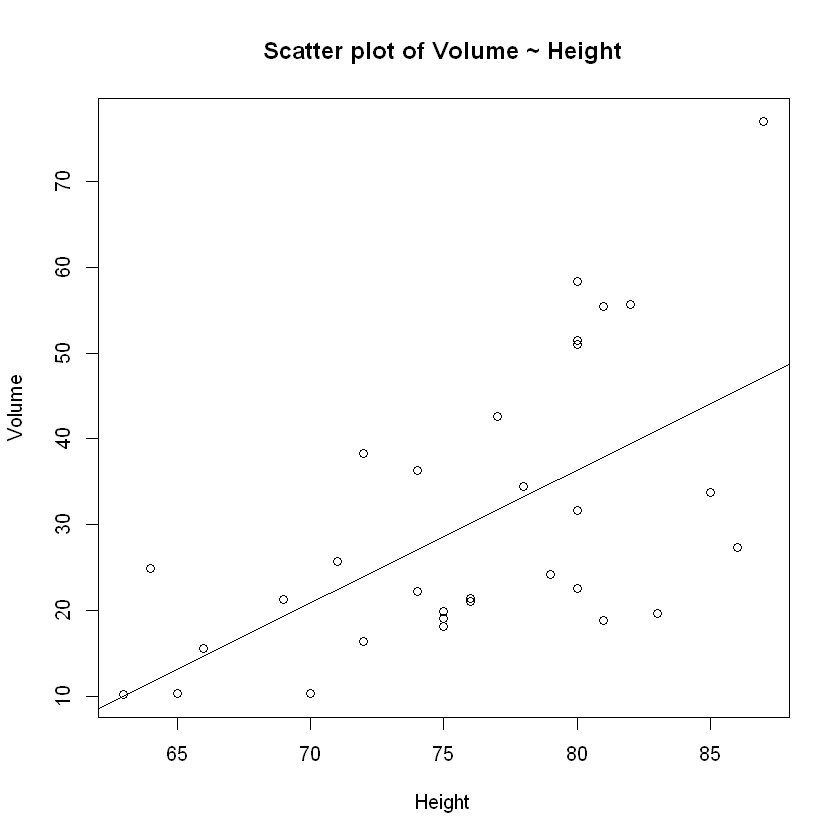

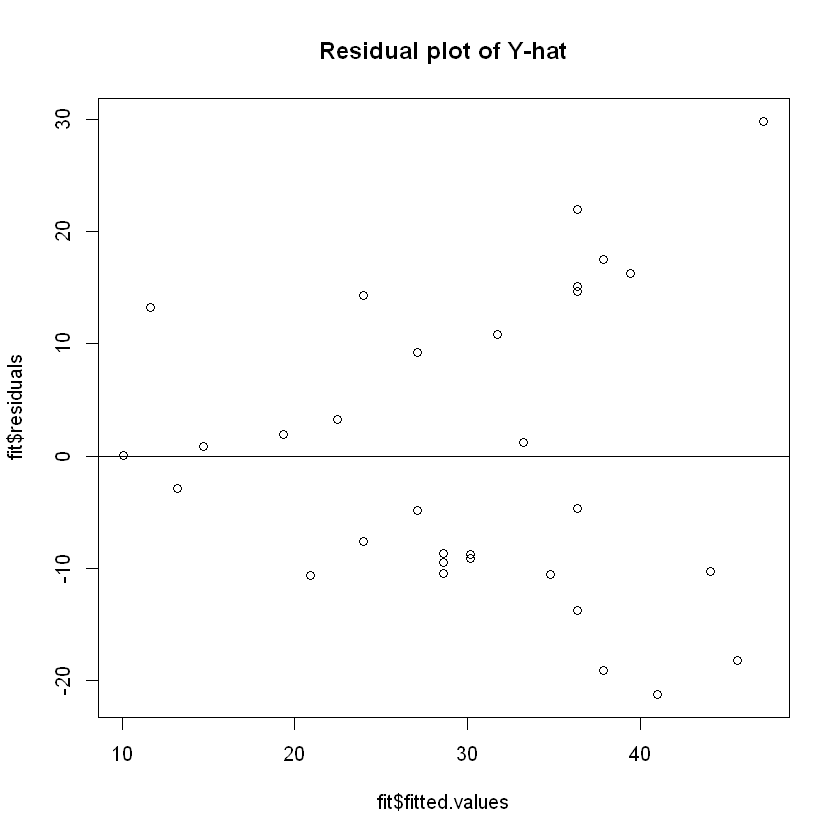

In [2]:
# scatter plot
plot(Volume ~ Height)
    title("Scatter plot of Volume ~ Height")
    abline(fit$coefficients[1], fit$coefficients[2])

# residual plot
plot(fit$fitted.values, fit$residuals)
    title("Residual plot of Y-hat")
    abline(h=0)

산점도에 추정된 회귀식을 나타낸 결과, 자료들이 회귀식에 다소 벗어나 분포하고 있음을 확인할 수 있다. 더불어, 이러한 오차를 확대하여 보여주는 잔차도로부터 잔차들의 분포가 나팔형태로 나타나며, 분산이 점차 커지고 있음을 볼 수 있다. 따라서 자료의 분포를 잘 적합하는 회귀식을 도출하기 위해선 변수변환을 해야 한다. 

#### b. Volume과 Height를 로그변환한 후, (a)의 작업을 반복하여라.

단순선형회귀모형의 오차항의 가정사항을 충족한다는 가정하에서 X와 Y변수를 모두 로그변환한 뒤 추정한 회귀식은 다음과 같다.
$$
y = -13.9587 + 3.9821x
$$

In [4]:
log_Volume <- log(Volume)
log_Height <- log(Height)

fit_log <- lm(log_Volume ~ log_Height)
summary(fit_log)


Call:
lm(formula = log_Volume ~ log_Height)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.65691 -0.27917 -0.08039  0.42193  0.61252 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -13.9587     3.7553  -3.717 0.000857 ***
log_Height    3.9821     0.8677   4.589 7.93e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4074 on 29 degrees of freedom
Multiple R-squared:  0.4207,	Adjusted R-squared:  0.4008 
F-statistic: 21.06 on 1 and 29 DF,  p-value: 7.928e-05


이때 기울기 계수의 유의성에 대한 검정통계량인 t통계량은 4.589이고, p값은 매우 작아 유의수준 5%하에서 유의하다. 더불어, F통계량은 21.06이며, 단순선형회귀모형이므로 p값은 앞선 t통계량의 p값과 동일하다. 즉, 추정된 회귀식은 통계적으로 유의하다고 볼 수 있다. 그러나 R-squred값은 0.4207로, 두 변수 간에 선형적 관계가 있다고 보기엔 작다. 이에 두 변수에 대한 산점도와 잔차도를 그려 모형의 적합성을 확인해보면 다음과 같다. 

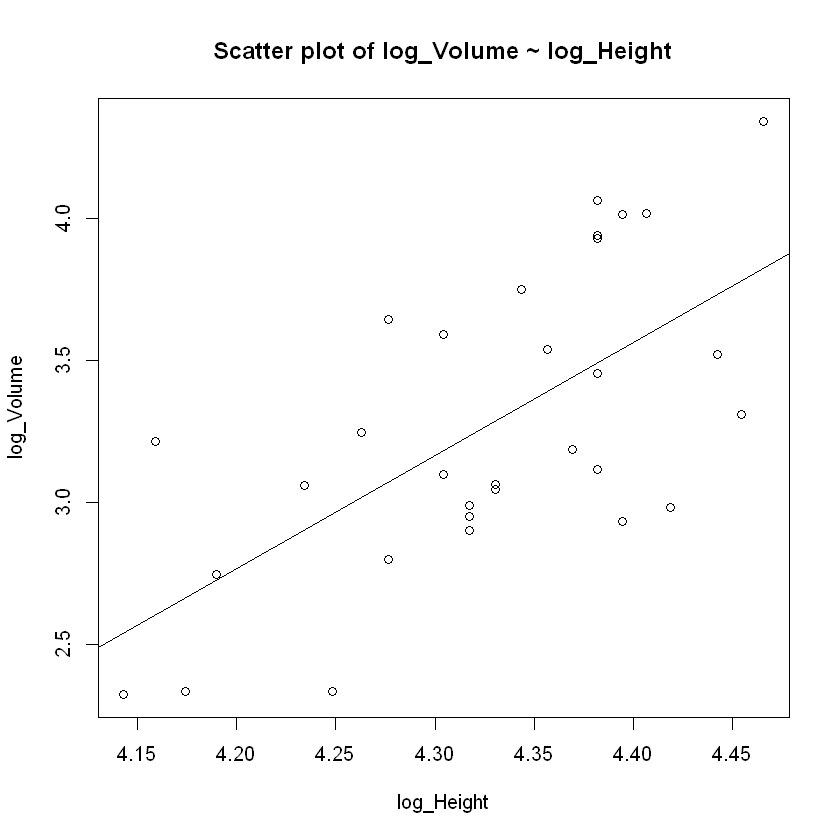

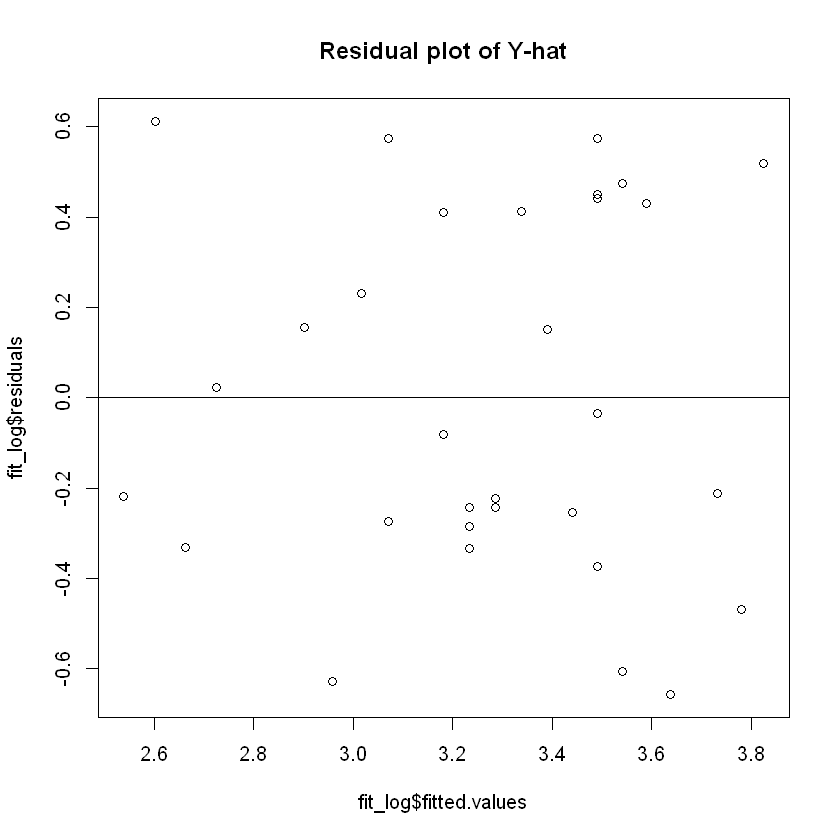

In [5]:
# scatter plot
plot(log_Volume ~ log_Height)
title("Scatter plot of log_Volume ~ log_Height")
abline(fit_log$coefficients[1], fit_log$coefficients[2])

# residual plot
plot(fit_log$fitted.values, fit_log$residuals)
title("Residual plot of Y-hat")
abline(h=0)

비록 자료들이 추정된 회귀식과는 떨어져 분포하고 있기는 하나, 추정된 회귀식은 자료들의 분포를 비교적 잘 설명하고 있다고 볼 수 있다. 더불어, 잔차도의 잔차들은 띠 형태로 분포하고 있다. 

#### c. (a)와 (b)의 결과를 비교하여라.

|Model|R-sq|F|
|:-:|:-:|:-:|
|Y~X|0.3579|16.16|
|logY~logX|0.4207|21.06|

R-squared값과 F통계량값을 이용하여 두 모형 중 어떤 모형이 더 적합한지를 판단할 수 있다. 이때, R-squared값과 F통계량값 모두 값이 클수록 통계적으로 더 유의하다. 따라서 로그변환을 한 모형이 원래의 모형보다 통계적으로 더 유의하게, 자료들의 분포를 적합하게 나타낸다고 판단할 수 있다. 더불어, 두 모형의 잔차도를 비교하여도 로그변환을 한 모형의 잔차도에선 원래의 잔차도가 보이던 잔차들의 나팔 형태가 완화되어 비교적 띠 모양으로 분포하고 있음을 확인할 수 있다. 

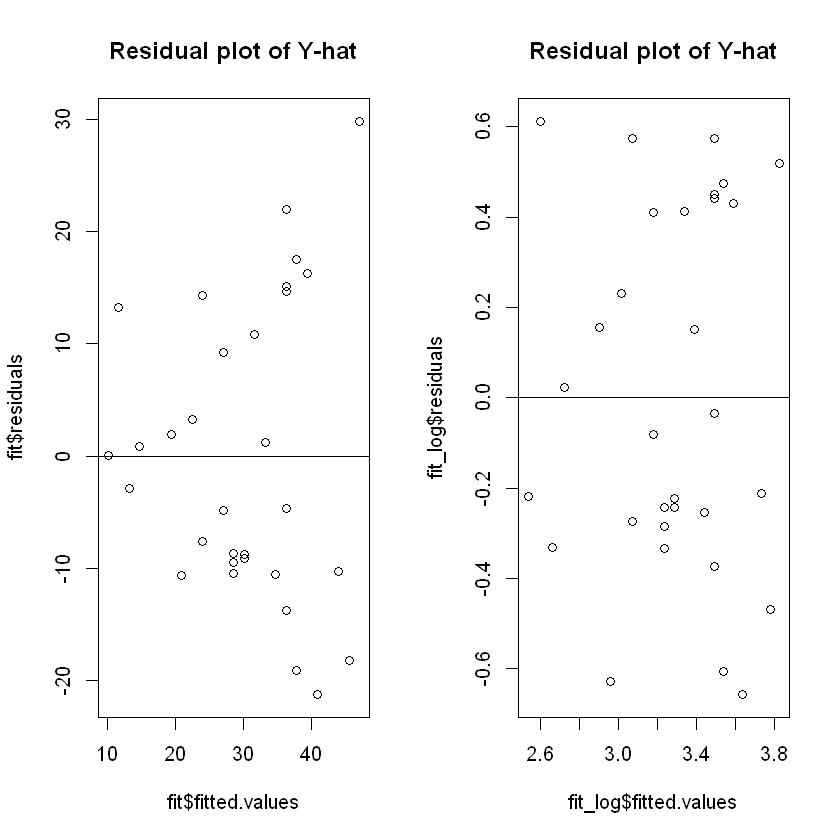

In [6]:
par(mfrow = c(1,2))
# residual plot X~Y
plot(fit$fitted.values, fit$residuals)
    title("Residual plot of Y-hat")
    abline(h=0)

# residual plot logX~logY
plot(fit_log$fitted.values, fit_log$residuals)
    title("Residual plot of Y-hat")
    abline(h=0)

#### d. 예제 16.1에서 Volume과 Girth를 로그변환한 것과 (c)에서의 결과를 이용하여 Girth와 Height가 같이 들어 있는 모형을 적합시키고, 잔차도를 그려 분석하여라. 

우선 반응변수인 log_Volume과 나머지 두 설명변수 간의 관계, 그리고 두 설명변수 간의 관계를 파악하기 위해 산점도 행렬을 그려보면 다음과 같다. 

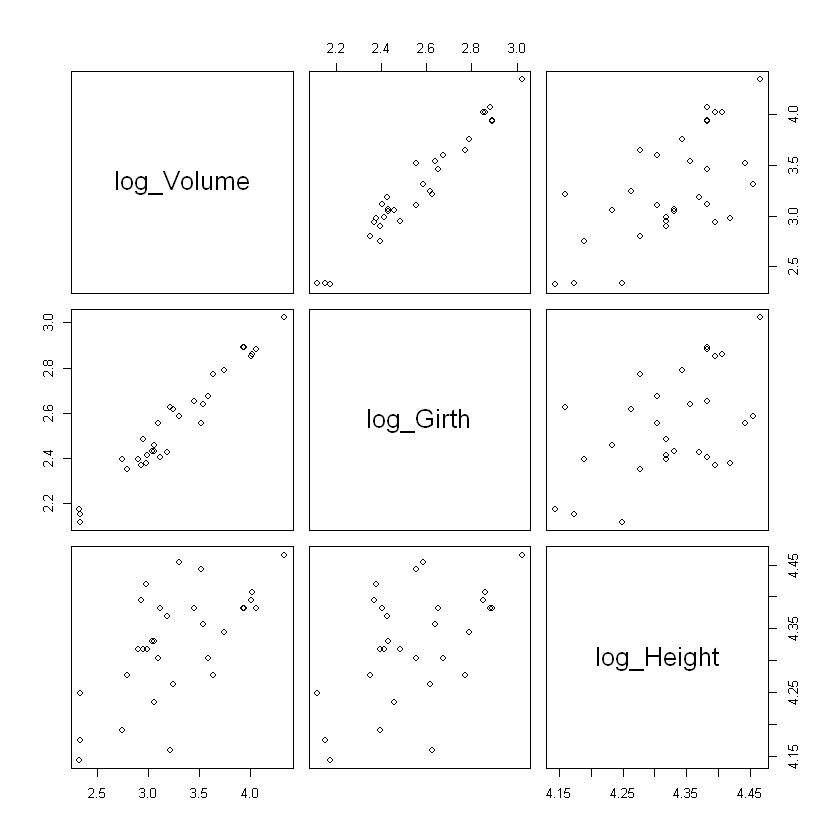

In [7]:
log_Girth <- log(Girth)
df_q8 <- data.frame(log_Volume, log_Girth, log_Height)

pairs(df_q8)

산점도행렬을 통해 로그변환한 Volume변수와 Girth변수 간에는 강한 선형관계가 있음을 확인할 수 있다. Volume변수와 Height변수 간에는 뚜렷하진 않으나 약한 선형관계가 존재하고 있음을, 두 설명변수인 Girth와 Height변수 간에는 선형관계가 있다고 보기 어려움을 확인할 수 있다. 이와 더불어, 변수들 간의 상관계수를 구하여 보면 다음과 같은데, 이는 산점도행렬을 통해 눈으로 확인한 결과를 뒷받침해준다.

In [8]:
cor(df_q8)

,log_Volume,log_Girth,log_Height
log_Volume,1.0000000,0.9766649,0.6486377
log_Girth,0.9766649,1.0000000,0.5301949
log_Height,0.6486377,0.5301949,1.0000000


다중선형회귀모형의 오차항은 다음과 같은 가정사항을 충족한다.
$$
\epsilon_{i} \sim  iid N(o, \sigma^2)
$$

 
1. 등분산성: 모든 오차항( 𝜖𝑖 )들의 평균은 0이고, 분산은  𝜎2 로 동일하다.
2. 독립성: 오차항( 𝜖𝑖 )들은 서로 독립이다.
3. 정규성: 오차항( 𝜖𝑖 )은 정규분포를 따른다.

오차항의 가정사항을 충족한다는 가정하에서 회귀식을 추정하면 다음과 같다. 

In [9]:
fit_log2 <- lm(log_Volume ~ log_Girth + log_Height)
summary(fit_log2)


Call:
lm(formula = log_Volume ~ log_Girth + log_Height)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.168561 -0.048488  0.002431  0.063637  0.129223 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.63162    0.79979  -8.292 5.06e-09 ***
log_Girth    1.98265    0.07501  26.432  < 2e-16 ***
log_Height   1.11712    0.20444   5.464 7.81e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08139 on 28 degrees of freedom
Multiple R-squared:  0.9777,	Adjusted R-squared:  0.9761 
F-statistic: 613.2 on 2 and 28 DF,  p-value: < 2.2e-16


추정된 회귀식은 다음과 같다. 
$$
y = -6.6316 + 1.9827x_{1} + 1.1171x_{2}
$$
$$
x_{1} = Girth, x_{2} = Height
$$

이때 각 변수의 기울기 계수에 대한 t통계량값은 순서대로 26.432, 5.464로, p값은 모두 매우 작다. 따라서 각 기울기 계수는 통계적으로 유의하다. 더불어, F통계량값은 613.2로, 이때의 p값도 매우 작아 추정된 회귀식은 통계적으로 유의하다는 결론을 내릴 수 있다. 이와 더불어, R-squared값은 0.9777로, 추정된 회귀식이 자료의 분포를 잘 적합하고 있다고 볼 수 있다.

잔차도를 그려보면 다음과 같다.

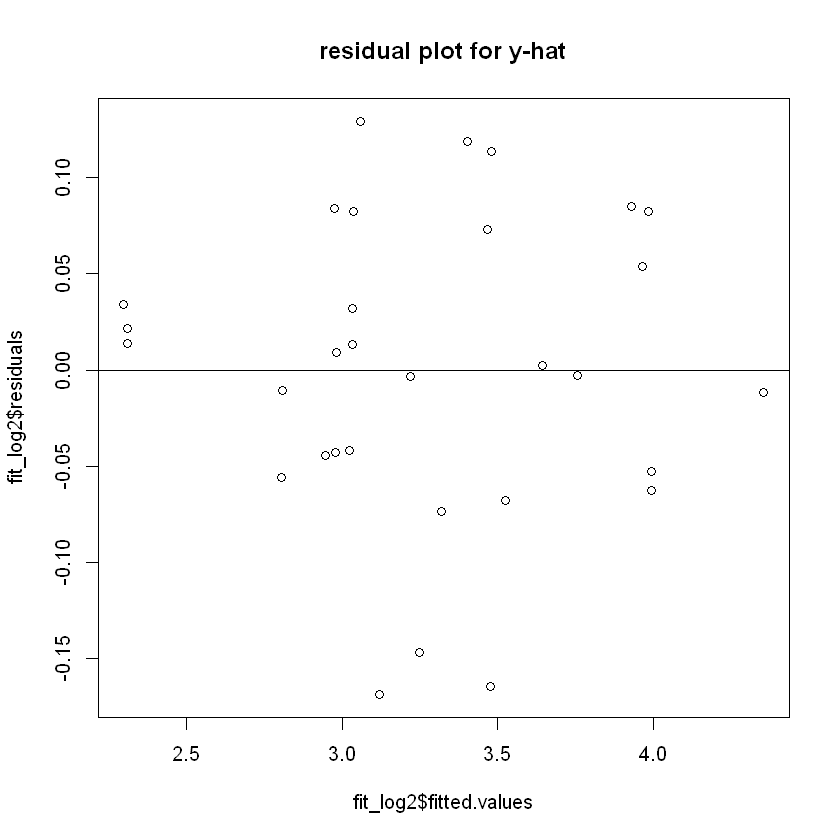

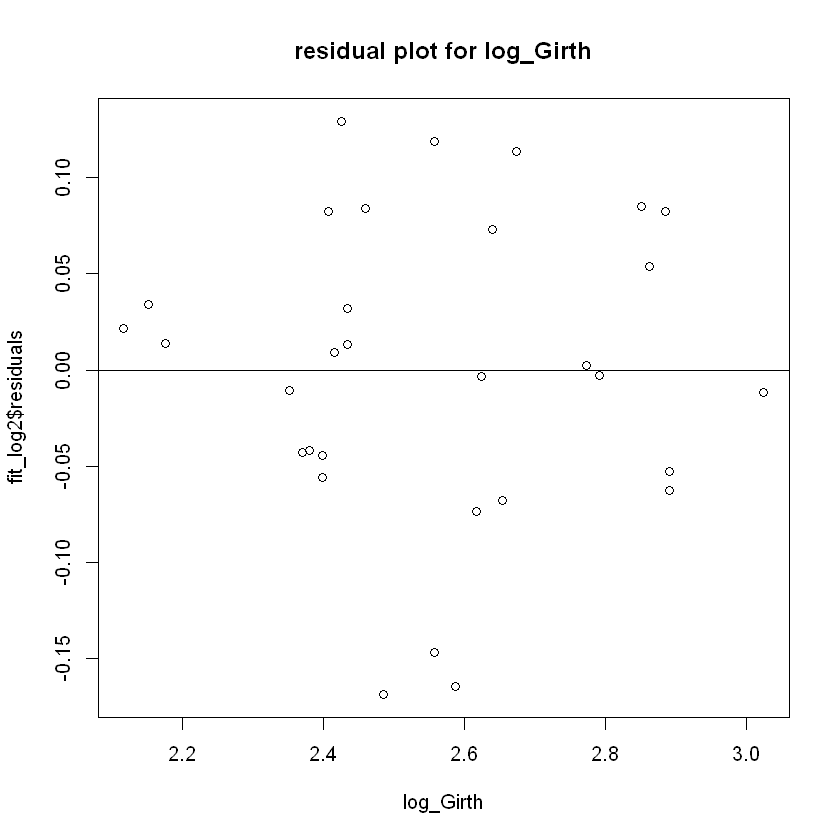

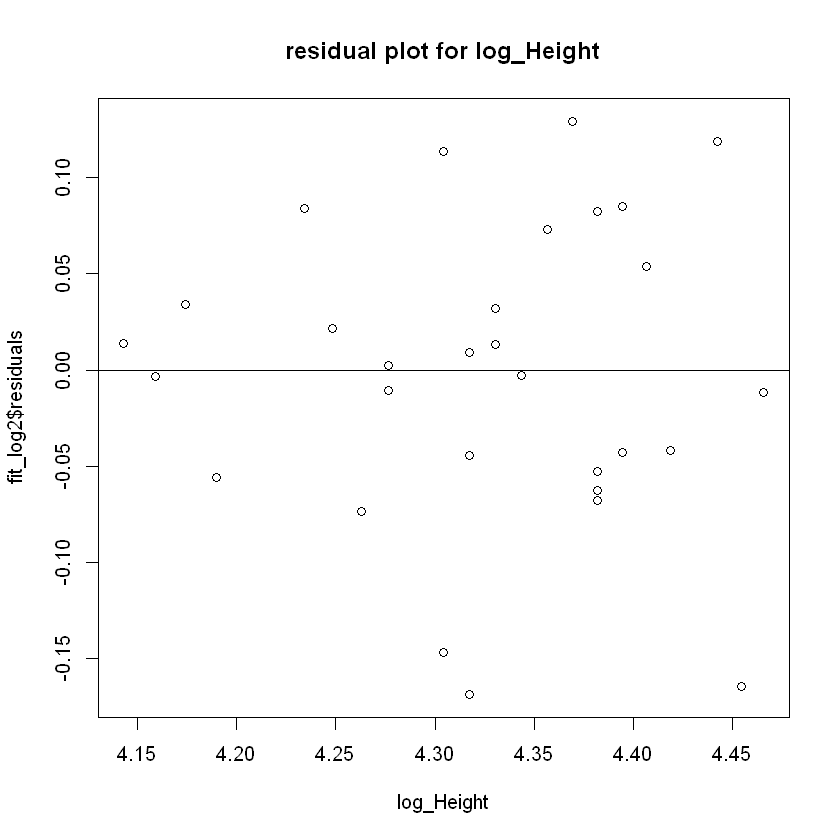

In [10]:
plot(fit_log2$fitted.values, fit_log2$residuals)
    title("residual plot for y-hat")
    abline(h = 0)

plot(log_Girth, fit_log2$residuals)
title("residual plot for log_Girth")
abline(h = 0)

plot(log_Height, fit_log2$residuals)
title("residual plot for log_Height")
abline(h = 0)

자료의 수가 적어 단정적으로 말하긴 어려우나, 세 잔차도에서 모두 잔차들의 분포가 띠 형태를 보이고 있음을 확인할 수 있다. 따라서 추정한 회귀식이 적합하다는 결론을 내릴 수 있다. 

#### 10. 자동차의 속도(speed, miles per hour)와 서는 거리(stopping distance)에 대한 자료이다. 적절한 변환을 하기 전과 후의 산점도와 회귀선을 보여라. 

우선 변수변환을 하기 전 두 변수 간의 산점도를 그려보면 다음과 같다.

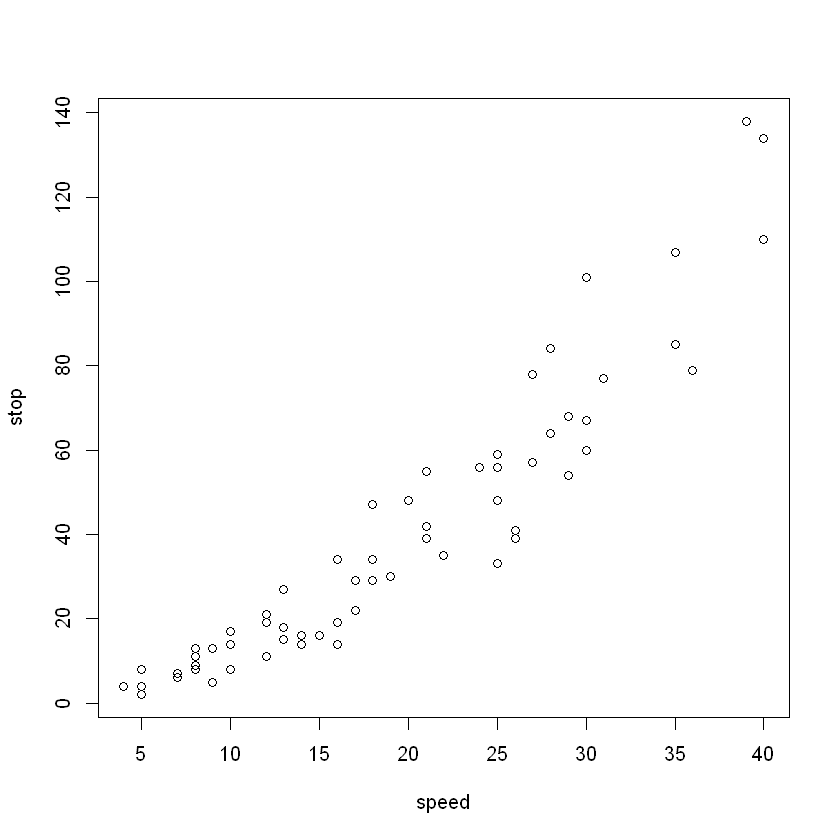

In [11]:
speed <- c(4, 5, 5, 5, 5, 7, 7, 8, 8, 8, 8, 9, 9, 9,
           10, 10, 10, 12, 12, 12, 13, 13, 13, 14, 14,
           15, 16, 16, 16, 17, 17, 18, 18, 18, 19, 20,
           21, 21, 21, 22, 24, 25, 25, 25, 25, 26, 26,
           27, 27, 28, 28, 29, 29, 30, 30, 30, 31, 35, 35,
           36, 39, 40, 40)
    
stop <- c(4, 2, 8, 8, 4, 6, 7, 9, 8, 13, 11, 5, 5, 13, 8, 17, 
          14, 11, 21, 19, 18, 27, 15, 14, 16, 16, 19, 14, 34, 29, 22,
          47, 29, 34, 30, 48, 55, 39, 42, 35, 56, 33, 59, 48, 56, 39, 41, 
          78, 57, 64, 84, 68, 54, 60, 101, 67, 77, 85, 107, 79, 138, 
          110, 134)

df_q10 <- data.frame(speed, stop)

plot(stop ~ speed)

산점도를 통해 자료의 분포가 J자 형태로 나타난다는 것을 확인할 수 있다. 회귀식을 적합하여 나타내 보면 다음과 같다.


Call:
lm(formula = stop ~ speed)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.141  -7.300  -2.141   6.044  35.946 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -20.2734     3.2384   -6.26 4.25e-08 ***
speed         3.1366     0.1517   20.68  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.8 on 61 degrees of freedom
Multiple R-squared:  0.8752,	Adjusted R-squared:  0.8731 
F-statistic: 427.7 on 1 and 61 DF,  p-value: < 2.2e-16


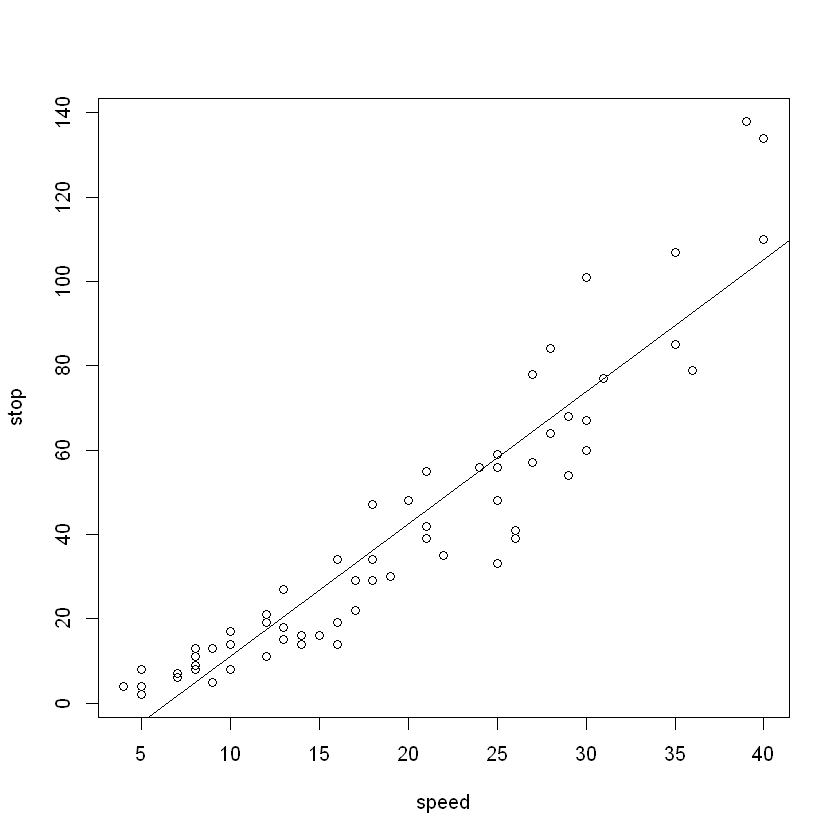

In [12]:
fit <- lm(stop ~ speed)
summary(fit)

plot(stop ~ speed)
    abline(fit$coefficients[1], fit$coefficients[2])

추정된 회귀식은 $y = -20.2734 + 3.1366x$이다. 

기울기 계수의 유의성을 검정하기 위한 t통계량값은 20.68로, 이때 p값은 매우 작다. 즉, 추정된 회귀식의 기울기 계수는 통계적으로 유의하다. 더불어, 전체 회귀계수의 유의성을 검정하기 위한 F통계량값은 427.7로, 단순선형회귀모형이기 때문에 이때의 p값은 기울기 계수에 대한 것과 동일하다. 즉, 추정된 회귀식은 통계적으로 유의하다. 더불어, R-squared값은 0.8752로, 추정된 회귀식이 자료의 분포를 비교적 잘 적합하고 있다고 판단할 수 있다. 

잔차도를 그려보면 다음과 같다.

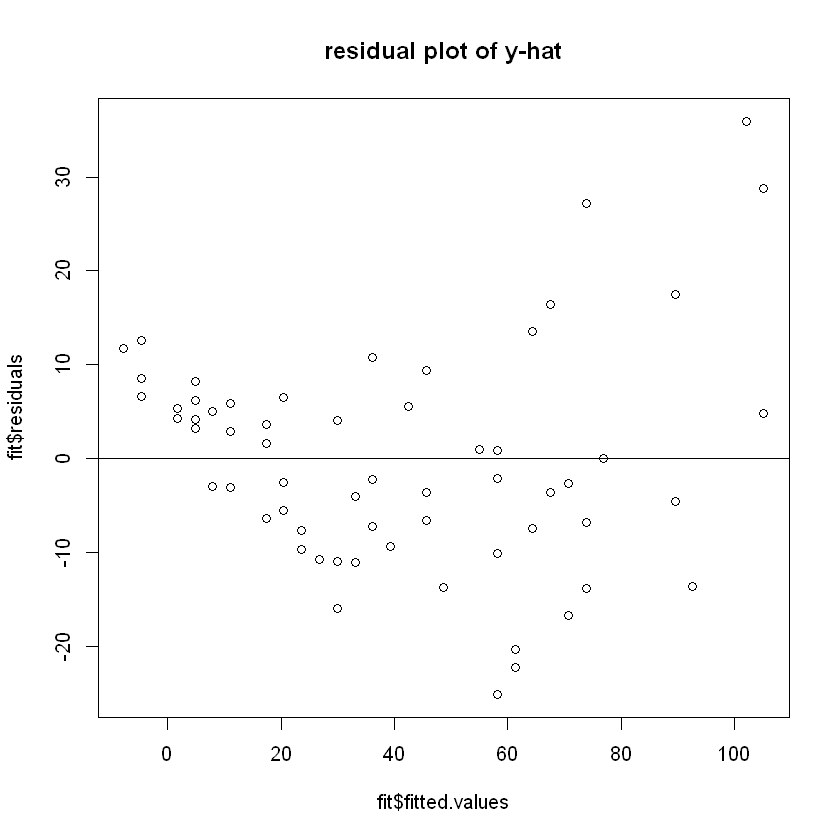

In [13]:
plot(fit$fitted.values, fit$residuals)
    title("residual plot of y-hat")
    abline(h=0)

앞선 결과와 달리, 잔차도를 통해 잔차들이 띠모양이 아닌 곡선(U자) 형태로 분포하고 있음을 확인할 수 있다. 이는 앞서 산점도에서도 확인했듯  전반적인 자료의 분포가 J자 형태를 띄고 있기 때문이다. 따라서 변수변환을 하여 더욱 적합한 회귀식을 찾을 필요가 있다. 

우선 두 변수를 로그변환하면 다음과 같다.

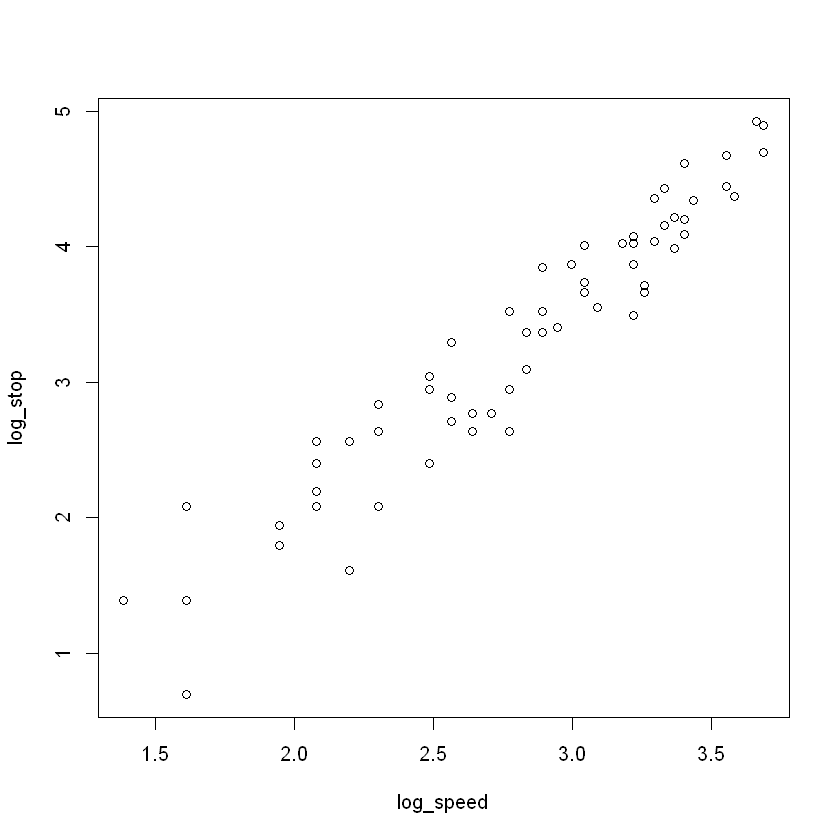

In [14]:
log_speed <- log(speed)
log_stop <- log(stop)

plot(log_stop ~ log_speed)

산점도를 그려본 결과, 변수변환을 하기 전보다 J자 형태가 많이 완화되었음을 확인할 수 있다. 회귀식을 추정하면 다음과 같다.

In [15]:
fit_log <- lm(log_stop ~ log_speed)
summary(fit_log)


Call:
lm(formula = log_stop ~ log_speed)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72642 -0.18512  0.02088  0.23810  0.66713 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.11650    0.18925   -5.90 1.72e-07 ***
log_speed    1.57124    0.06646   23.64  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3148 on 61 degrees of freedom
Multiple R-squared:  0.9016,	Adjusted R-squared:    0.9 
F-statistic:   559 on 1 and 61 DF,  p-value: < 2.2e-16


추정된 회귀식은 $y = -1.1165 + 1.5712x$이다. 이때 기울기계수에 대한 t통계량값은 23.64이며, p값은 매우 작다. 따라서 추정된 회귀식의 기울기 계수는 통계적으로 유의하다. 더불어 F통계량값은 559로, 이때 p값은 단순선형회귀모형이기 때문에 t통계량값의 것과 동일하다. 따라서 추정된 회귀식은 통계적으로 유의하다는 결론을 내릴 수 있다. 더불어, R-squared값은 0.9016으로, 변수변환을 하기 전보다 커졌음을 확인할 수 있다. 

잔차도를 그려보면 다음과 같다.

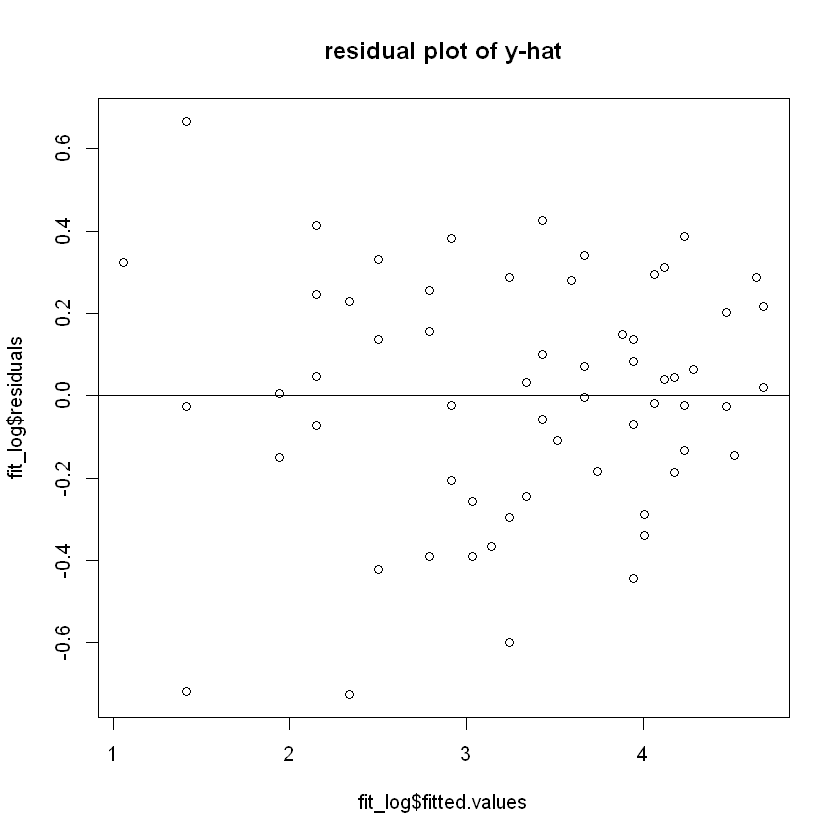

In [16]:
plot(fit_log$fitted.values, fit_log$residuals)
    title("residual plot of y-hat")
    abline(h=0)

변수변환을 하기 전에 비해 잔차들이 비교적 띠 모양으로 분포하고 있음을 확인할 수 있다. 

다음으로 두 변수는 제곱근변환하여 보면 다음과 같다.

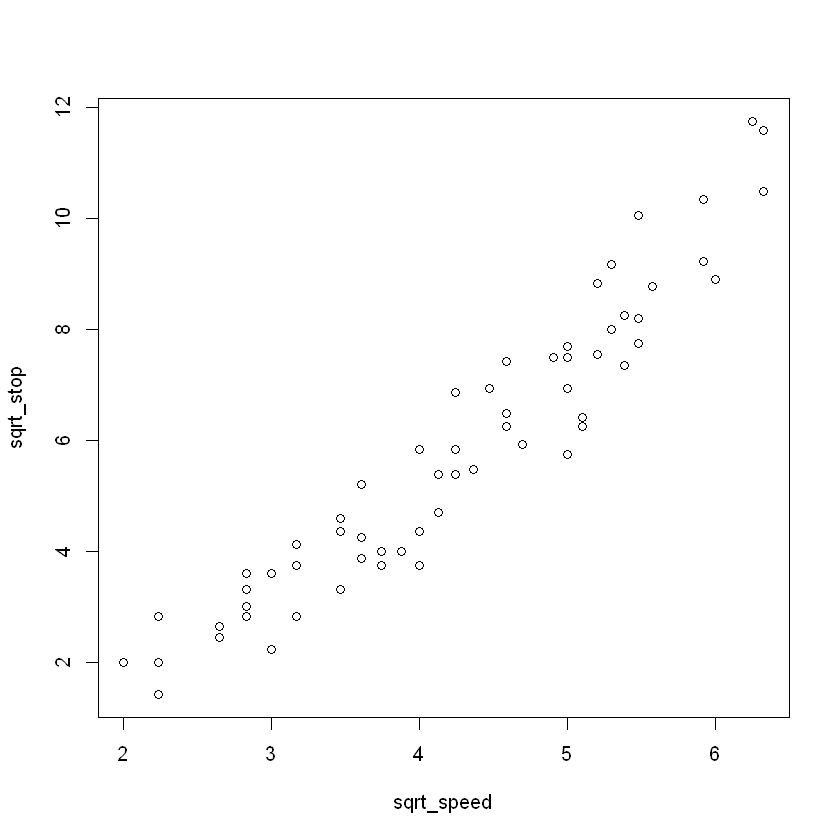

In [17]:
sqrt_speed <- sqrt(speed)
sqrt_stop <- sqrt(stop)

plot(sqrt_stop ~ sqrt_speed)

산점도를 통해 변수변환을 하기 전보다 J자 형태가 완화되었음을 확인할 수 있다. 회귀식을 추정하면 다음과 같다.

In [18]:
fit_sqrt <- lm(sqrt_stop ~ sqrt_speed)
summary(fit_sqrt)


Call:
lm(formula = sqrt_stop ~ sqrt_speed)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.65524 -0.63797  0.00685  0.51306  1.72604 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.12832    0.38032  -8.225  1.8e-11 ***
sqrt_speed   2.10563    0.08733  24.112  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8063 on 61 degrees of freedom
Multiple R-squared:  0.905,	Adjusted R-squared:  0.9035 
F-statistic: 581.4 on 1 and 61 DF,  p-value: < 2.2e-16


추정된 회귀식은 $y = -3.1283 + 2.1056x$이다. 

기울기 계수의 유의성을 검정하기 위한 t통계량값은 24.112로, 이때 p값은 매우 작다. 즉, 추정된 회귀식의 기울기 계수는 통계적으로 유의하다. 더불어, 전체 회귀계수의 유의성을 검정하기 위한 F통계량값은 581.4로, 단순선형회귀모형이기 때문에 이때의 p값은 기울기 계수에 대한 것과 동일하다. 즉, 추정된 회귀식은 통계적으로 유의하다. 더불어, R-squared값은 0.905로, 추정된 회귀식이 자료의 분포를 비교적 잘 적합하고 있다고 판단할 수 있다.

원래의 모형, 로그변환한 모형, 제곱근변환한 모형 이렇게 세 모형을 비교해보면 다음과 같다. 

|Model|F통계량값|R-sq|
|:-:|:-:|:-:|
|Y-X|427.7|0.8752|
|logY-logX|559|0.9016|
|sqrtY-sqrtX|581.4|0.905|

세 모형의 F통계량값과 R-squared값을 비교해본 결과, 두 값 모두 제곱근변환을 한 모형이 가장 크다는 것을 확인할 수 있다.이때 F통계량값과 R-squared값 모두 그 크기가 클수록 통계적으로 더 유의하다. 따라서 세 모형 중 가장 적합한 모형은 제곱근변환을 한 모형이다. 이는 자동차의 속도와 제동거리 간의 식이 다음과 같기 때문이라고 분석해 볼 수 있다.
$$
d = \frac{v^2}{2\mu g} 
$$
$$
d = 거리, v = 속도, \mu = 마찰계수, g = 중력가속도
$$

제곱근변환을 한 모형에 대한 잔차도를 그려보면 다음과 같다. 

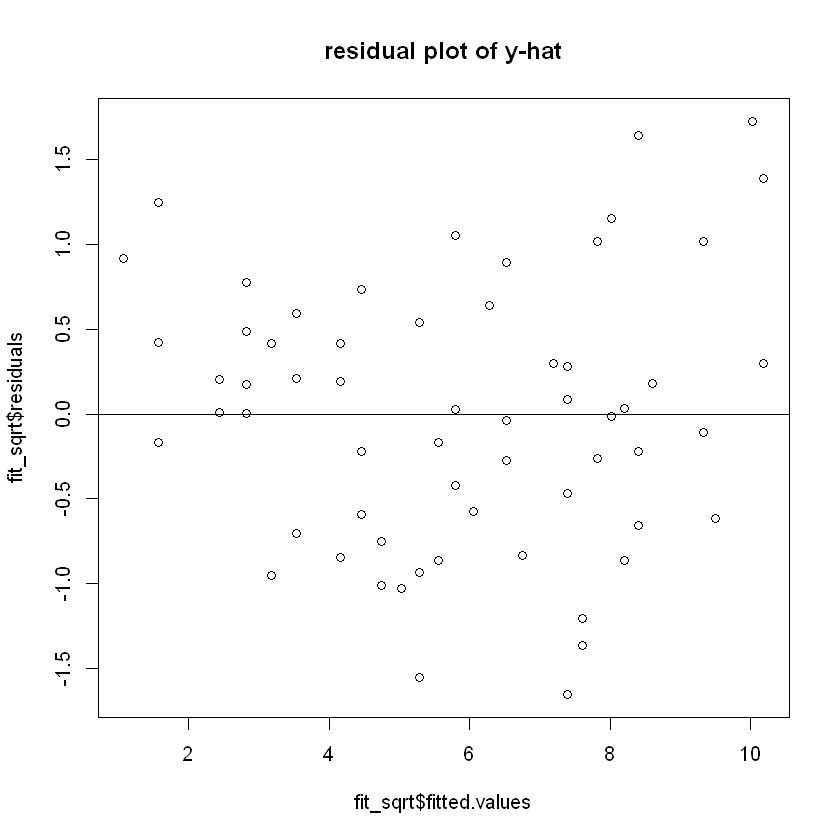

In [20]:
plot(fit_sqrt$fitted.values, fit_sqrt$residuals)
title("residual plot of y-hat")
abline(h=0)

잔차들이 비교적 띠 형태로 분포하고 있음을 확인할 수 있다. 따라서 제곱근변환을 한 변수들에 대하여 추정한 회귀식은 자료들의 분포를 잘 적합한다고 판단할 수 있다.

#### 11. 시멘트가 마르면서 굳어지는 시간(curing time, days) 동안 시멘트의 인장력(tensile strength, kg/$cm^2$)을 조사하였다. 

In [21]:
# assigning data
time <- c(1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 
            28, 28, 28, 28, 28)
strength <- c(13.0, 13.3, 11.8, 21.9, 24.5, 24.7, 29.8, 29.0, 24.1, 24.2, 
              26.2, 32.4, 30.4, 34.5, 33.1, 35.7, 41.8, 42.6, 40.3, 35.7, 37.3)
df_q11 <- data.frame(time, strength)

#### a. 시간과 인장력의 산점도를 그려 선형성을 판단하여라. 
시간과 인장력 간의 산점도를 그리면 다음과 같다.

[1] 0.783103

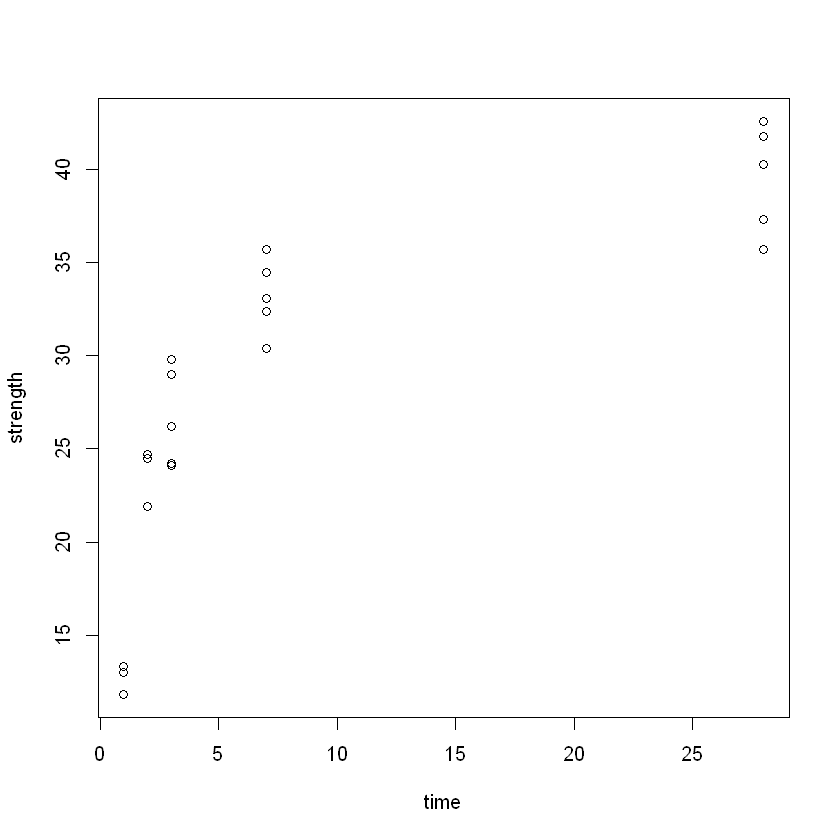

In [22]:
# scatter plot
plot(strength ~ time)

cor(time, strength)

산점도를 그려 확인해 본 결과, 두 변수 간에 뚜렷한 선형적 관계가 있다고 보기 어려우며, J자 형태의 분포를 관찰할 수 있다. 더불어, 두 변수의 상관계수도 0.7831로, 약한 편이라고 볼 수 있다. 따라서 두 변수의 관계에 대하여 회귀분석을 하기 위해선 변수변환이 필요하다. 

#### b. 시간의 역수를 취하고, 인장력의 log를 취하여 산점도를 그리고 회귀선을 추정하여라. 
우선, 시간 변수에는 역수를, 인장력 변수에는 log를 취하여 변수변환을 하여 산점도를 그려보면 다음과 같다. 이때, 역수를 취하는 경우에는 -를 붙여 음수로 만들어 자료의 순서를 그대로 유지할 수 있다.  

[1] 0.9798083

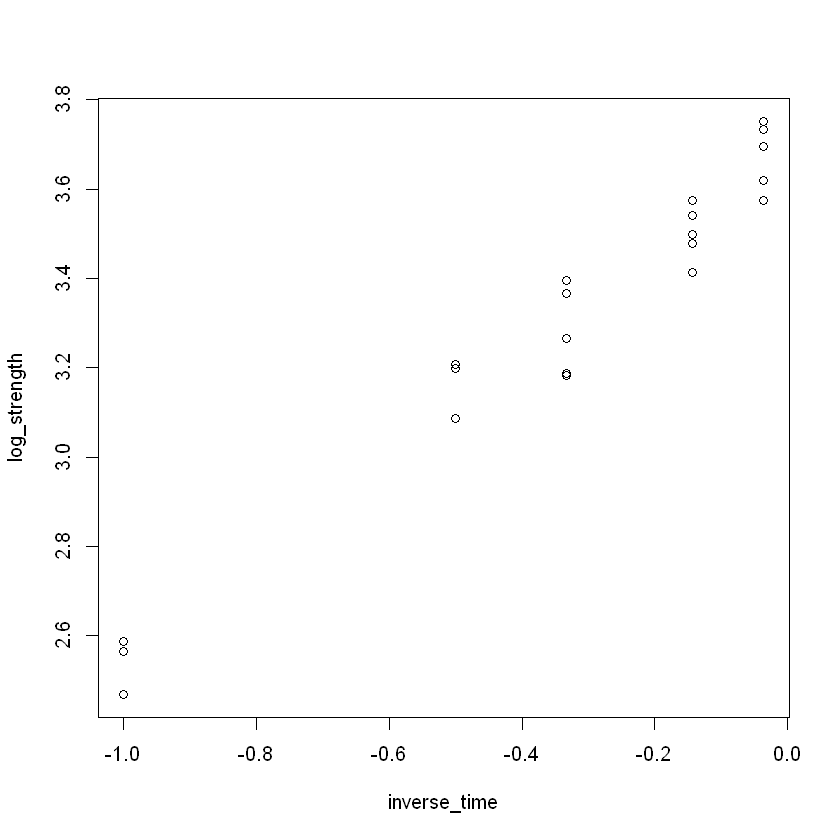

In [23]:
# scatter plot
inverse_time <- -1 / time
log_strength <- log(strength)
plot(log_strength ~ inverse_time)

# correlation
cor(inverse_time, log_strength)

변수변환을 한 후 자료의 J자 형태의 분포가 많이 완화되었음을 확인할 수 있다. 더불어, 두 변수의 상관계수도 0.9798로 커졌다. 

두 변수 간의 관계를 나타내는 단순선형회귀모형의 오차항은 다음과 같은 가정사항을 충족해야 한다. 
$$
\epsilon_{i} \sim  iid N(o, \sigma^2)
$$

 
1. 등분산성: 모든 오차항( 𝜖𝑖 )들의 평균은 0이고, 분산은  𝜎2 로 동일하다.
2. 독립성: 오차항( 𝜖𝑖 )들은 서로 독립이다.
3. 정규성: 오차항( 𝜖𝑖 )은 정규분포를 따른다.

오차항의 가정사항을 충족한다는 가정하에서 두 변수의 회귀식을 추정하면 다음과 같다.

$$
y = 3.6895 + 1.1456x
$$

In [29]:
# linear model
fit <- lm(log_strength ~ inverse_time)
summary(fit)


Call:
lm(formula = log_strength ~ inverse_time)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.12543 -0.04769  0.01511  0.05965  0.10326 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.68951    0.02459  150.06  < 2e-16 ***
inverse_time  1.14558    0.05363   21.36 9.59e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07661 on 19 degrees of freedom
Multiple R-squared:   0.96,	Adjusted R-squared:  0.9579 
F-statistic: 456.3 on 1 and 19 DF,  p-value: 9.592e-15


추정한 회귀식을 산점도에 적합하여 보면 다음과 같다.

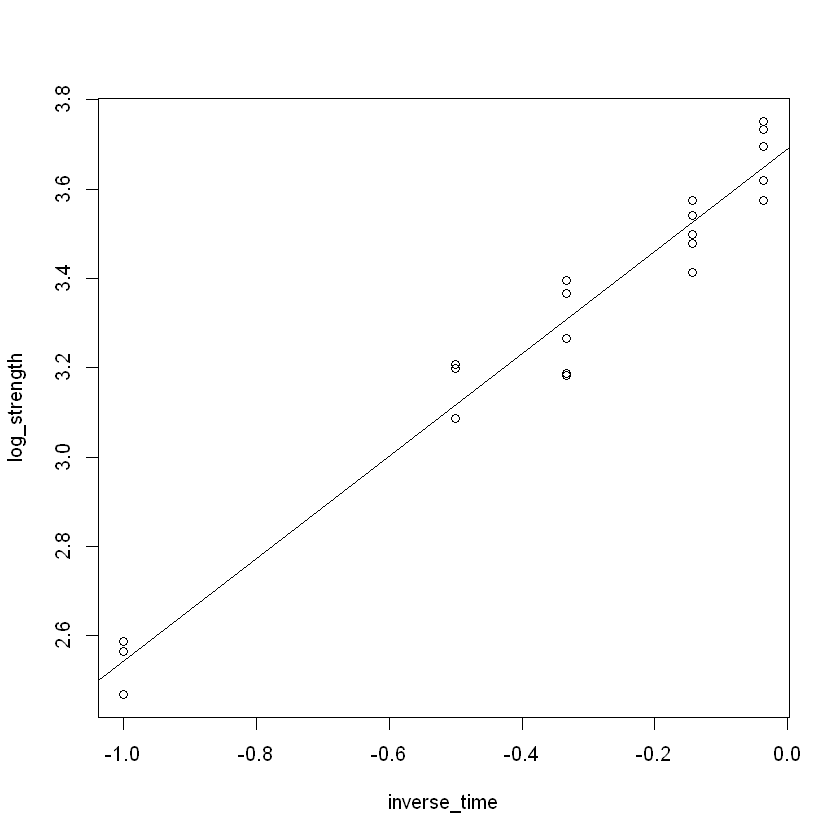

In [30]:
plot(log_strength ~ inverse_time)
    abline(fit$coefficients[1], fit$coefficients[2])

#### c. 변환하기 전과 후의 잔차도를 비교하고 적합성을 판단하여라. 

우선 변환하기 전의 회귀식을 추정하면 다음과 같다. 이때 추정된 단순회귀모형의 오차항은 다음과 같은 가정사항을 충족함을 가정한다. 

$$
\epsilon_{i} \sim  iid N(o, \sigma^2)
$$

 
1. 등분산성: 모든 오차항( 𝜖𝑖 )들의 평균은 0이고, 분산은  𝜎2 로 동일하다.
2. 독립성: 오차항( 𝜖𝑖 )들은 서로 독립이다.
3. 정규성: 오차항( 𝜖𝑖 )은 정규분포를 따른다.

$$
y = 22.6609 + 0.6554x
$$

In [31]:
# linear model 변수변환 전
fit_orgin <- lm(strength ~ time)
summary(fit_orgin)


Call:
lm(formula = strength ~ time)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5163  -2.0717   0.7283   4.3729   8.4514 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.6609     1.6936  13.380 4.03e-11 ***
time          0.6554     0.1194   5.489 2.70e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.775 on 19 degrees of freedom
Multiple R-squared:  0.6133,	Adjusted R-squared:  0.5929 
F-statistic: 30.13 on 1 and 19 DF,  p-value: 2.7e-05


추정한 회귀식을 산점도에 적합하여 보면 다음과 같다. 

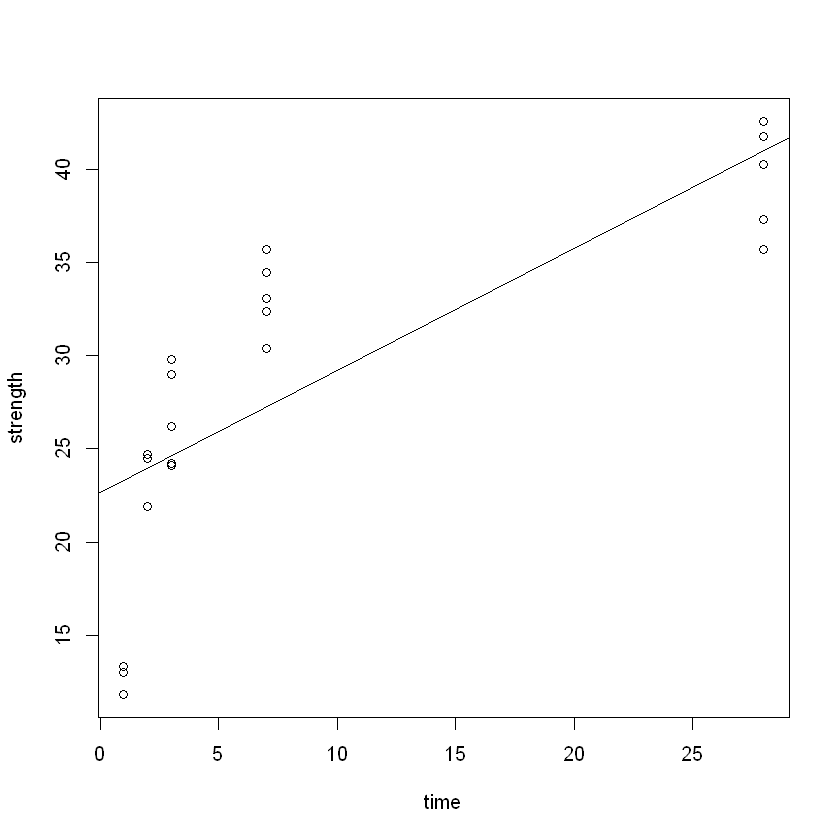

In [32]:
plot(strength ~ time)
    abline(fit_orgin$coefficients[1], fit_orgin$coefficients[2])

변수변환을 한 회귀모형과 비교했을 때 육안으로도 변수변환을 한 모형의 적합성이 더 좋다는 것을 확인할 수 있다. 잔차도를 통해 두 모형의 적합성을 더욱 구체적으로 비교해보면 다음과 같다. 변수변환 후 잔차들의 분포가 보다 고르게 퍼지게 되었음을 확인할 수 있다.

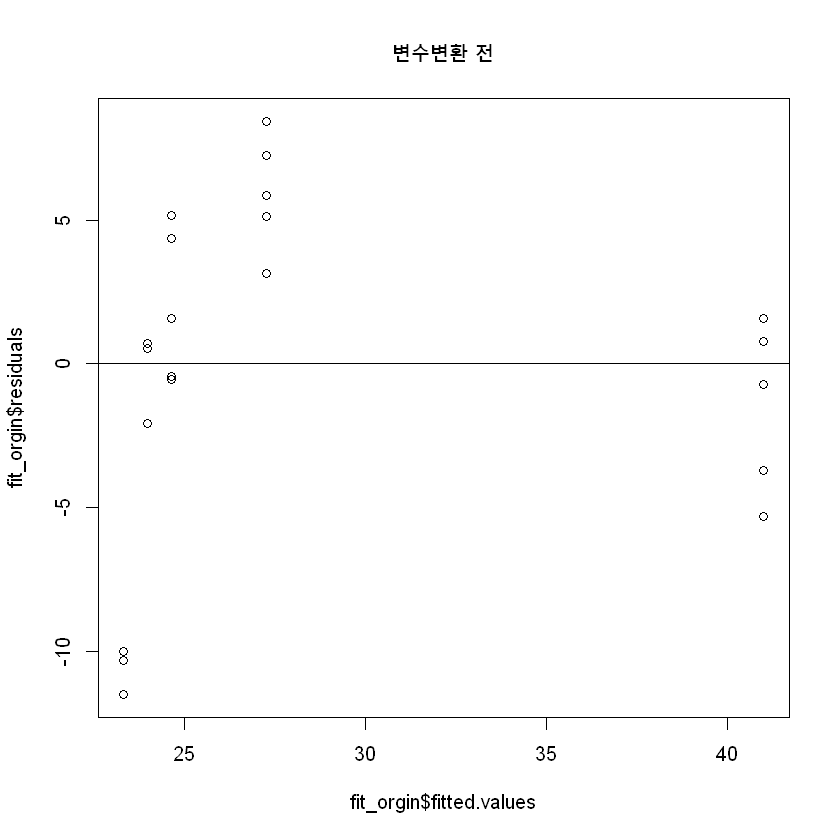

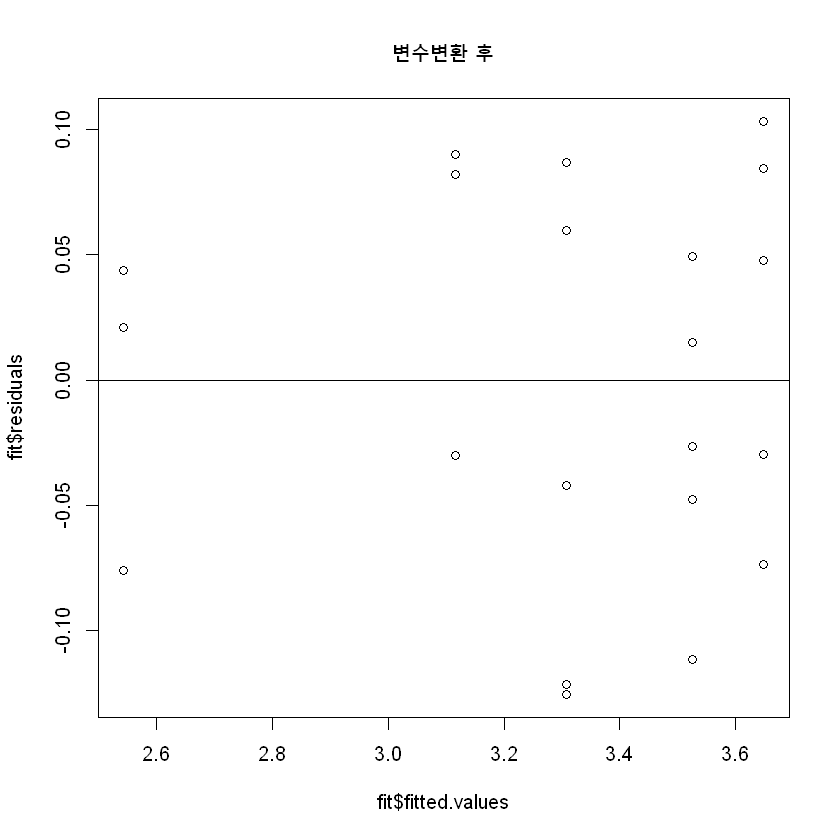

In [33]:
# residual plots
## 변수변환 전
plot(fit_orgin$fitted.values, fit_orgin$residuals)
    title("변수변환 전")
    abline(h = 0)

## 변수변환 후
plot(fit$fitted.values, fit$residuals)
    title("변수변환 후")
    abline(h = 0)    

두 모형을 통계량을 비교해 보면 다음과 같다.

|Model|F통계량값|R-sq|
|:-:|:-:|:-:|
|Y-X|30.13|0.6133|
|logY-1/X|456.3|0.96|

값이 클수록 통계적으로 유의하다고 볼 수 있는 F통계량값과 R-squared값 모두 변수변환 한 모형이 더 크다는 점에서 적합성이 더 크다는 결론을 내릴 수 있다. 

#### 14-18. 각각 일정한 압력(Pressure applied during pressing)을 가해 만들어진 종이 4장을 찢어지기까지 필요한 힘(tear factor)을 조사하였다. 

In [1]:
# assigning data

pressing <- c(rep(35.0,4), rep(49.5,4), rep(70.0,4), rep(99.0,4), rep(140.0, 4))
tear <- c(112, 119, 117, 113, 108, 99, 112, 118,
          120, 106, 102, 109, 110, 101, 99, 104,
          100, 102, 96, 101)   

#### a. 산점도를 그려 패턴을 설명하여라. 
압력(Pressure)과 찢기 위해 필요한 힘(Tear factor) 간의 산점도를 그리면 다음과 같다. 

[1] -0.7051314

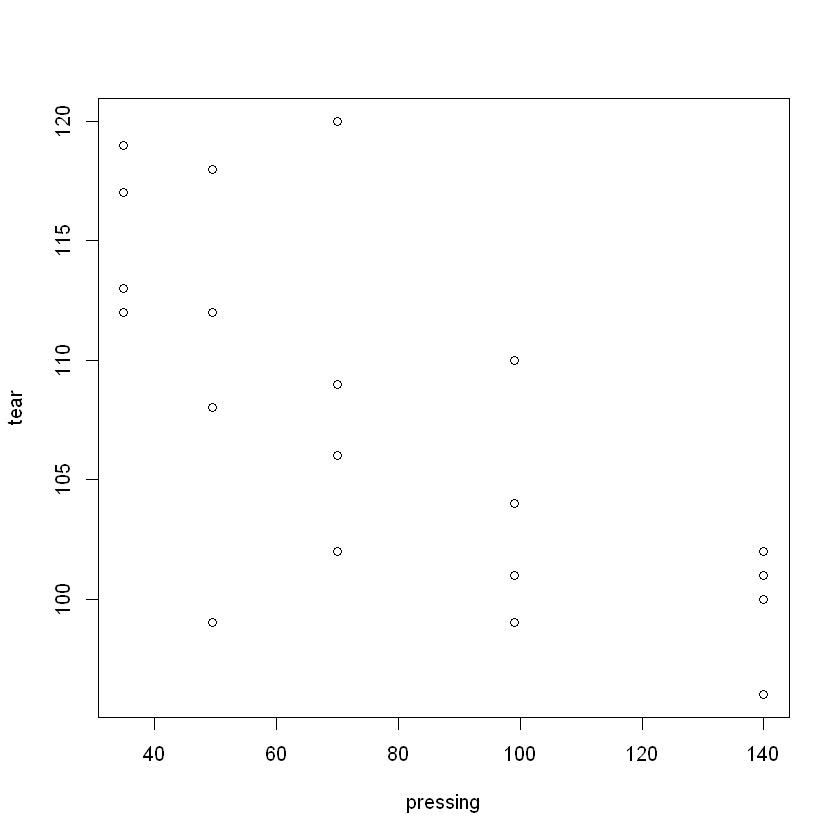

In [2]:
# scatter plot
plot(tear ~ pressing)

# correlation
cor(pressing, tear)

산점도를 통해 두 변수 간에 음의 선형관계가 있는 것을 확인할 수 있으며, 따라서 종이를 만드는데 가해진 압력과 그 종이를 찢기 위해 필요한 힘 간에는 반비례 관계가 작용한다고 볼 수 있다. 그러나, 전반적으로 자료가 흩어져 있어 뚜렷한 선형관계가 있다고 보기는 어려우며, 상관계수는 -0.7051로, 뚜렷한 선형관계가 있다고 보기엔 작다. 

#### b. 회귀식을 추정하고 잔차도를 그려라. 

추정된 단순회귀모형의 오차항은 다음과 같은 가정사항을 충족해야 한다.

$$
\epsilon_{i} \sim  iid N(o, \sigma^2)
$$

 
1. 등분산성: 모든 오차항( 𝜖𝑖 )들의 평균은 0이고, 분산은  𝜎2 로 동일하다.
2. 독립성: 오차항( 𝜖𝑖 )들은 서로 독립이다.
3. 정규성: 오차항( 𝜖𝑖 )은 정규분포를 따른다.

오차항의 가정사항을 충족한다고 가정할 때, 추정된 회귀식은 다음과 같다. 
$$
y = 118.1955 - 0.1372x
$$

In [7]:
fit <- lm(tear ~ pressing)
summary(fit)


Call:
lm(formula = tear ~ pressing)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.4054  -3.0949   0.0061   3.1579  11.4066 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 118.19545    2.83350  41.714  < 2e-16 ***
pressing     -0.13717    0.03251  -4.219 0.000516 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.443 on 18 degrees of freedom
Multiple R-squared:  0.4972,	Adjusted R-squared:  0.4693 
F-statistic:  17.8 on 1 and 18 DF,  p-value: 0.0005159


이때 추정된 회귀식의 기울기 계수에 대한 t통계량값은 -4.219이고, 이때 p값은 0.0005이다. 따라서 유의수준 5%하에서 기울기 계수는 유의하다고 볼 수 있다. 더불어, F통계량값은 17.8인데, 이때 p값은 단순회귀모형이기 때문에 t통계량값일 때와 같다. 따라서 추정된 회귀식은 통계적으로 유의하다고 볼 수 있다. 

그러나 R-squared값은 0.4972로, 추정된 회귀식이 자료의 분포를 잘 적합한다고 보기는 어렵다. 다음과 같이 산점도에 추정된 회귀식을 나타내어도 자료들이 회귀식에 벗어나 분포하고 있음을 확인할 수 있다. 

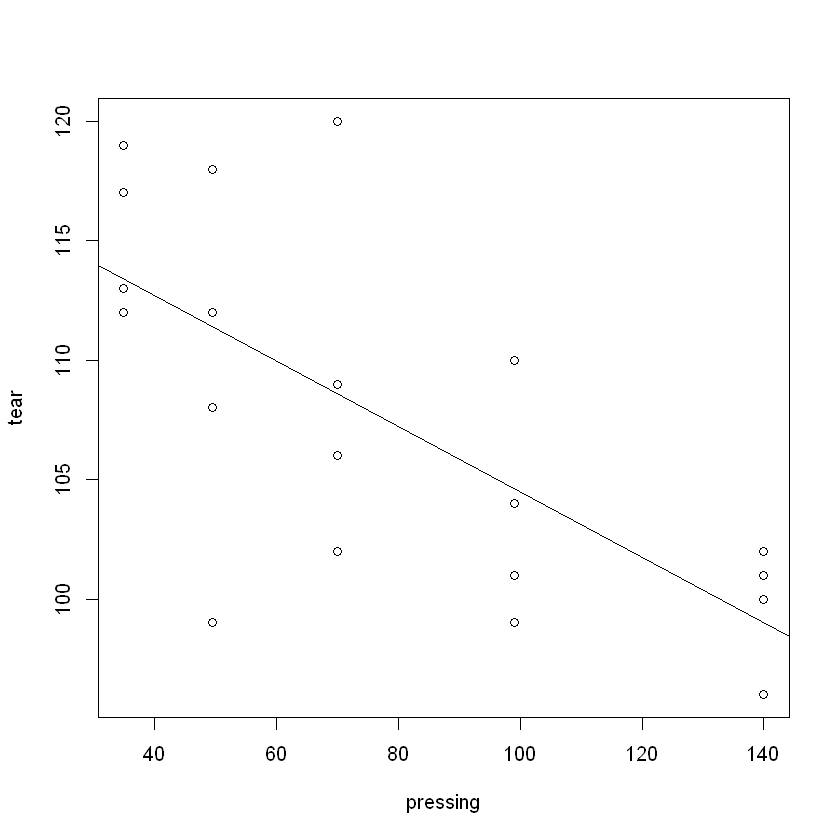

In [8]:
plot(tear ~ pressing)
    abline(fit$coefficients[1], fit$coefficients[2])

자료들이 회귀식에 벗어나 있는 정도를 더 자세히 살펴보기 위해 잔차도를 그려보면 다음과 같다. 

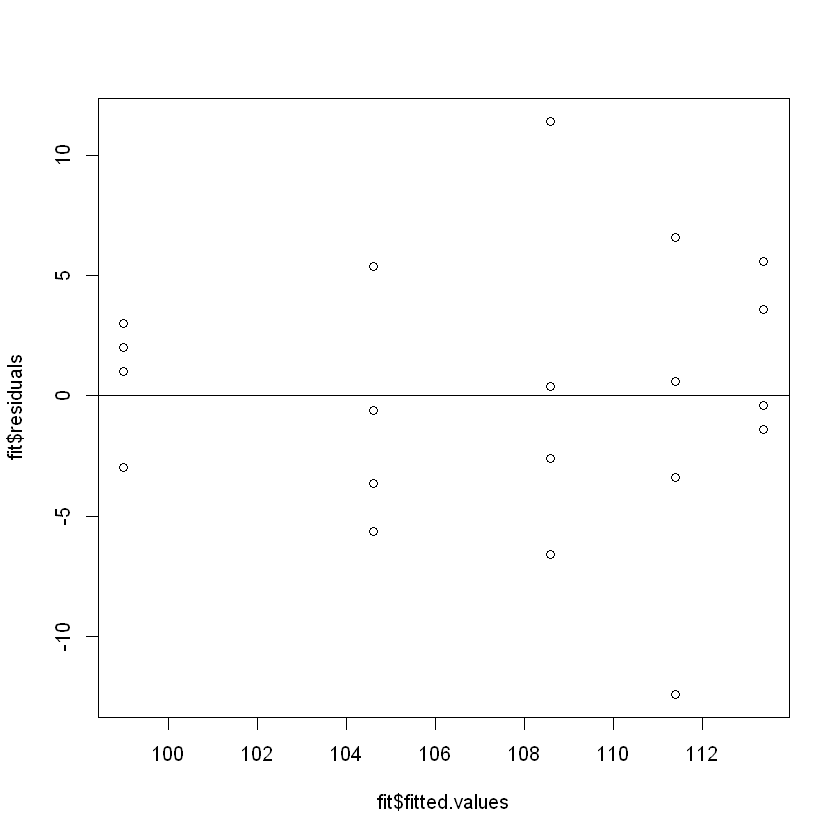

In [9]:
# residual plot
plot(fit$fitted.values, fit$residuals)
    abline(h=0)

자료의 수가 적어 뚜렷한 패턴이 있다고 단정하기는 어려우나, 전반적으로 잔차들이 크게 흩어져 있다.

#### c. 이 자료를 실험한 연구자는 Pressing Pressure의 값을 등간격으로 설정하지 않았다. 35.0, 49.5, 70.0, ... 값들은 등비율 간격이다. 각각의 비율을 내어 등비율 간격임을 확인하여라. 

압력값들 간의 비율을 구하면 약 0.707로 동일하여 등비율 간격임을 확인할 수 있다.

In [10]:
(35.0/49.5)
(49.5/70.0)    
(70.0/99.0)    
(99.0/140.0)    

[1] 0.7070707

[1] 0.7071429

[1] 0.7070707

[1] 0.7071429

#### d. 실험 연구자는 이미 등간격이 아니라 등비율의 pressure가 tear factor에 일정한 비율로 영향을 미친다고 생각하고 있었다. 
#### (1) Pressing Pressure를 log변환하여 산점도를 그리고 a와 비교하여 패턴을 설명하여라. 
변수변환을 하기 전 모형의 산점도와 압력 변수를 log변환하여 그린 산점도를 비교하면 다음과 같다.

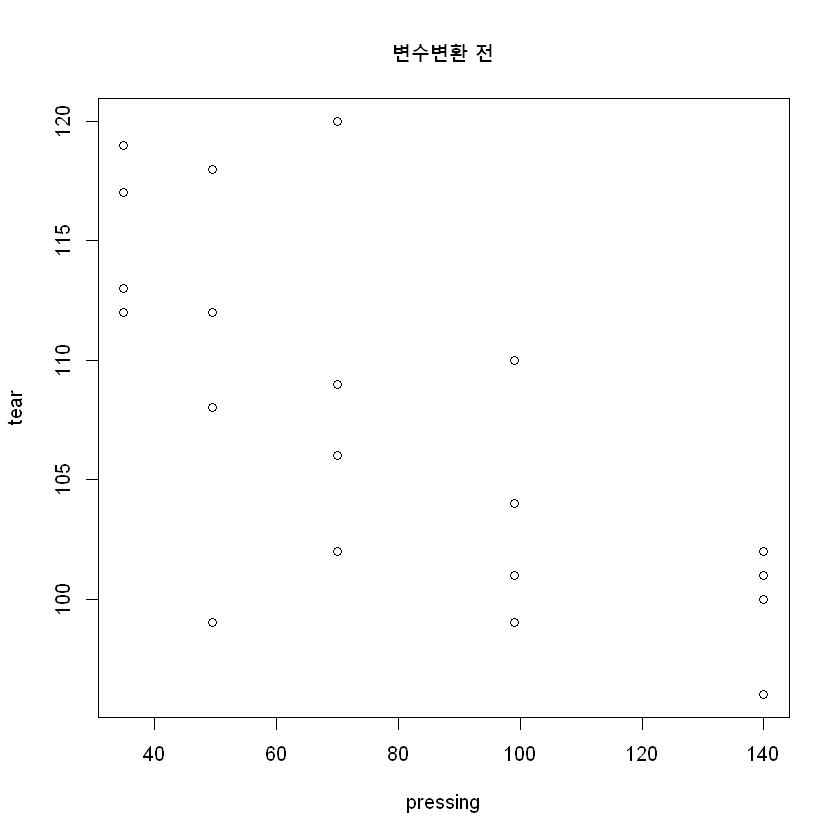

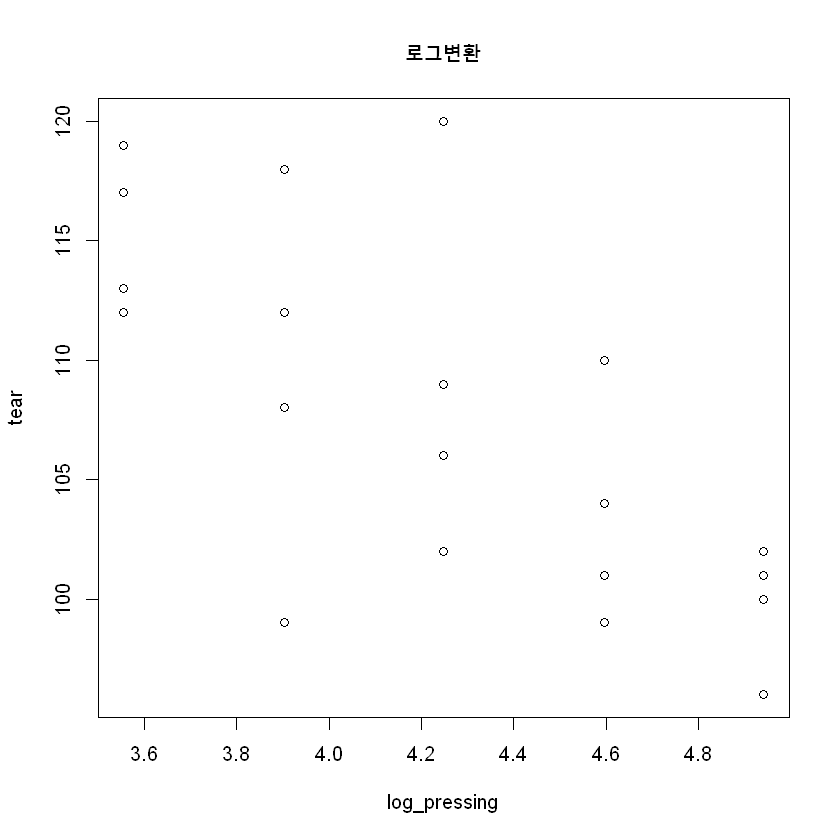

In [19]:
# scattor plot
plot(tear ~ pressing)
    title("변수변환 전")

log_pressing <- log(pressing)
plot(tear ~ log_pressing)
    title("로그변환")

두 모형의 산점도를 비교하여 보면, 변수변환 전에는 압력 변수의 값들이 등비율 간격으로 나타나고 있는 반면, 로그변환을 한 후의 값들은 등간격으로 나타나고 있음을 확인할 수 있다. 이는 다음과 같은 로그의 성질에 기인한다.
$$
log(x_{1}) - log(x_{2}) = log(\frac{x_{1}}{x_{2}})
$$

In [17]:
(log(35.0)-log(49.5))
(log(49.5)-log(70.0))
(log(70.0)-log(99.0))
(log(99.0)-log(140.0))

[1] -0.3466246

[1] -0.3465226

[1] -0.3466246

[1] -0.3465226

In [20]:
cor(pressing, tear)
cor(log_pressing, tear)

[1] -0.7051314

[1] -0.7136317

이때 두 모형의 선형계수는 변수변환 전이 -0.7051, 로그변환 후가 -0.7135으로, 변환한 후 자료의 선형성이 강화되었다고 볼 수 있다.

#### (2) Pressing Pressure를 제곱근변환하여 산점도를 그리고 a와 비교하여 패턴을 설명하여라. 
변수변환을 하기 전 모형의 산점도와 압력 변수를 제곱근변환하여 그린 산점도를 비교하면 다음과 같다.

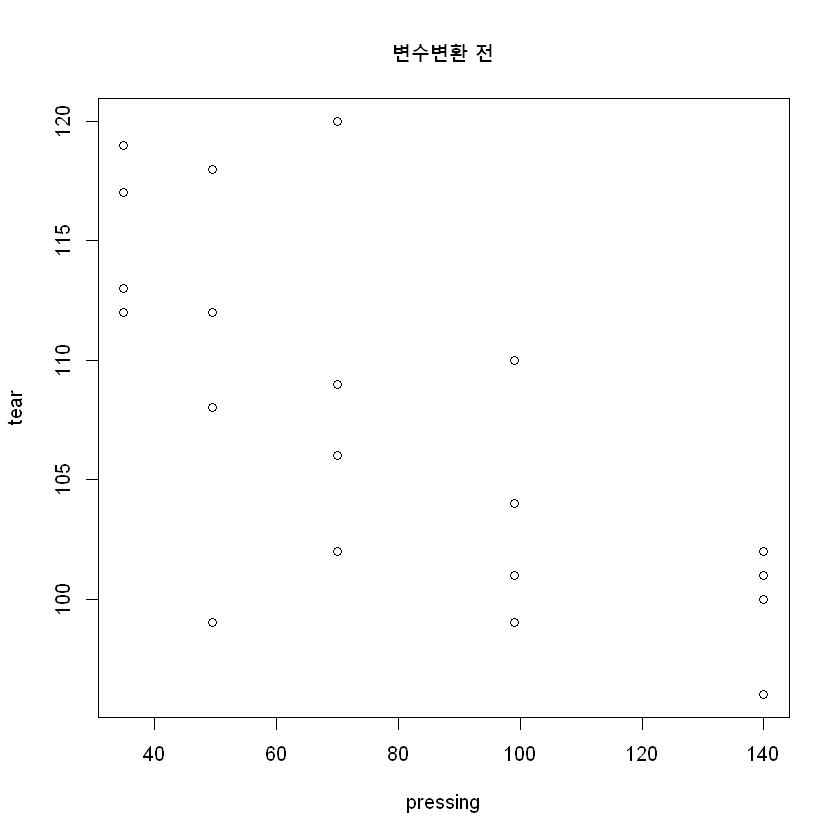

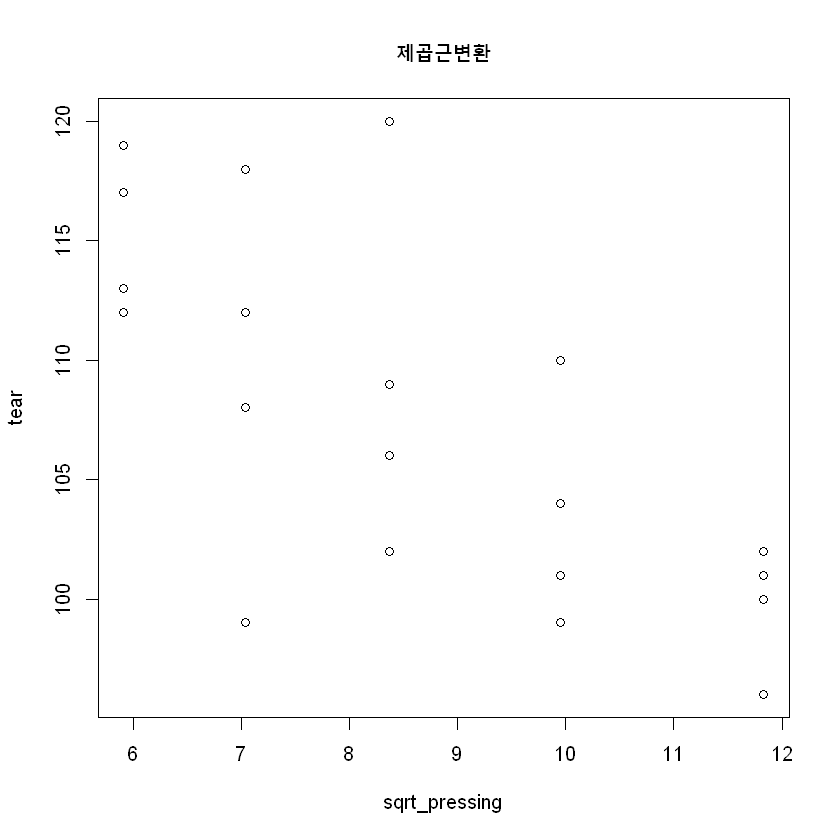

In [18]:
# scatter plot

plot(tear ~ pressing)
    title("변수변환 전")

sqrt_pressing <- sqrt(pressing)
plot(tear ~ sqrt_pressing)
    title("제곱근변환")

로그변환을 한 경우와 달리, 제곱근변환을 한 경우에는 압력 변수 값들이 등간격으로 나타나지는 않는다. 그러나 압력값들 간의 간격이 좀 더 등간격으로 변화하였으며, 이에 따라 전반적인 자료의 분포가 더 선형적으로 변하였음을 확인할 수 있다.

In [21]:
cor(pressing, tear)
cor(sqrt_pressing, tear)

[1] -0.7051314

[1] -0.7124548

두 모형의 상관계수를 비교하여도, 변수변환 전이 -0.7051, 제곱근변환 후가 -0.7125로 선형성이 더 강해졌음을 확인할 수 있다.

#### e. (1) Log(Pressing Pressure)로 회귀식을 추정하고 잔차도를 그려 b의 결과와 비교하여라.
로그변환한 경우에도 단순선형회귀모형의 오차항의 가정사항을 충족한다는 가정하에서 회귀식을 추정하면 다음과 같다. 
$$
y = 152.451 - 10.604x
$$

In [32]:
fit_log <- lm(tear ~ log_pressing)
summary(fit_log)


Call:
lm(formula = tear ~ log_pressing)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.0747  -2.8314   0.1126   2.0248  12.5998 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   152.451     10.493  14.529 2.19e-11 ***
log_pressing  -10.604      2.453  -4.322 0.000411 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.378 on 18 degrees of freedom
Multiple R-squared:  0.5093,	Adjusted R-squared:  0.482 
F-statistic: 18.68 on 1 and 18 DF,  p-value: 0.0004105


추정된 회귀식을 산점도에 적합하여 보면 다음과 같다. 

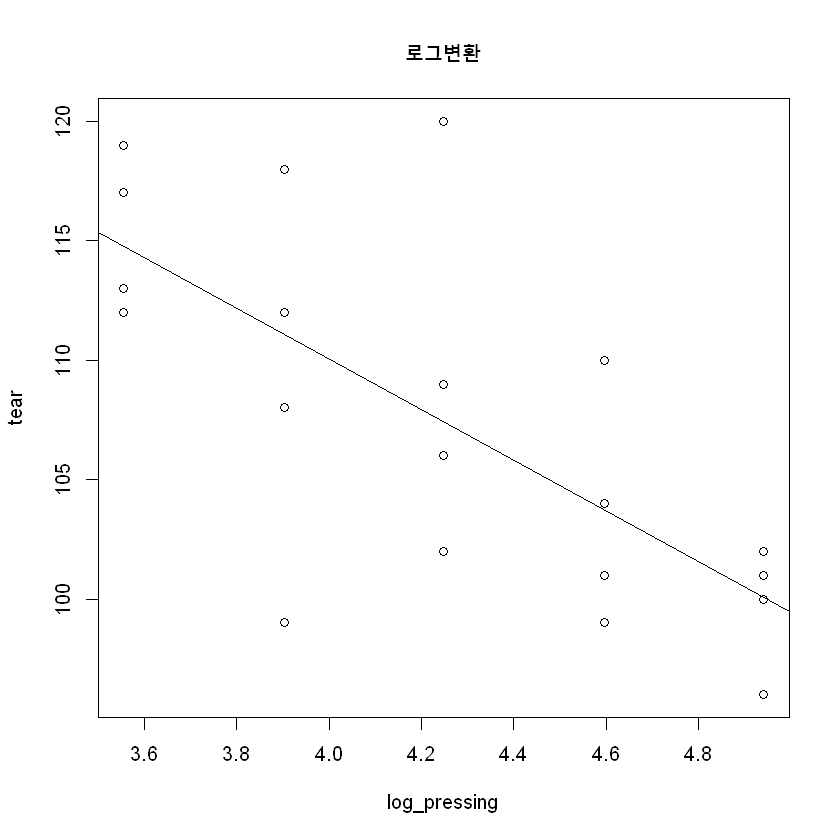

In [25]:
# scatter plot
plot(tear ~ log_pressing)
    abline(fit_log$coefficients[1], fit_log$coefficients[2])
    title("로그변환")

산점도를 통해 회귀식에 벗어나 분포하는 자료들을 확인할 수 있는데, 잔차도를 그려 보다 자세히 살펴보면 다음과 같다.

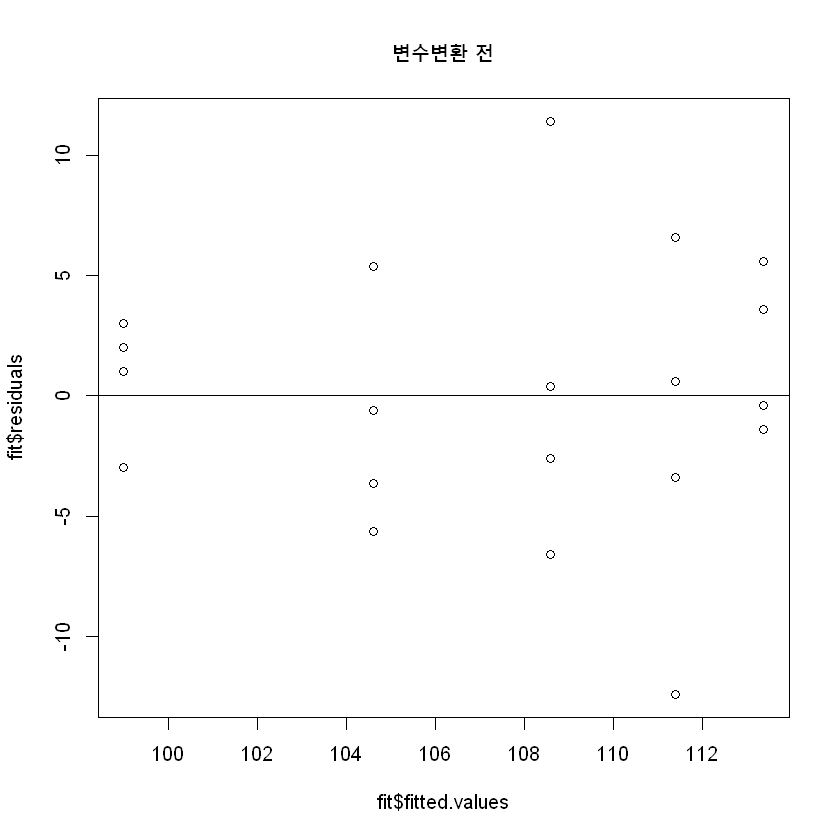

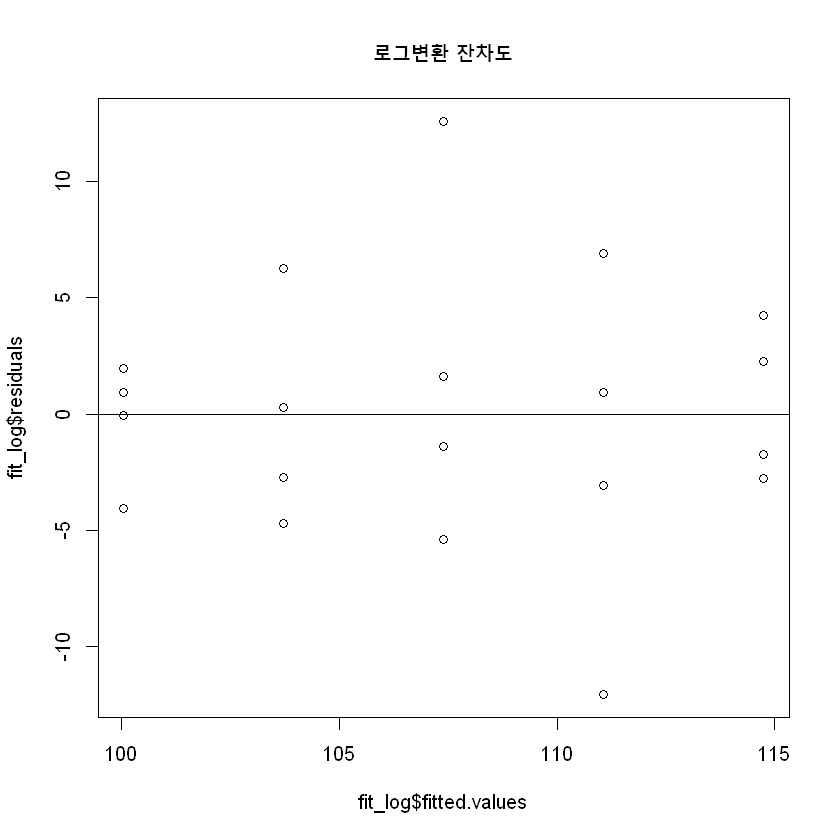

In [27]:
# residual plot
plot(fit$fitted.values, fit$residuals)
    abline(h=0)
    title("변수변환 전")

plot(fit_log$fitted.values, fit_log$residuals)
    abline(h=0)
    title("로그변환 잔차도")

자료의 수가 적어 패턴을 단정짓기는 어려우나, 로그변환을 한 후 잔차들이 퍼져있는 정도가 완화되었음을 확인할 수 있다.

#### (2) 제곱근(Pressing Pressure)로 회귀식을 추정하고 잔차도를 그려 b의 결과와 비교하여라.
제곱근변환한 경우에도 단순선형회귀모형의 오차항의 가정사항을 충족한다는 가정하에서 회귀식을 추정하면 다음과 같다. 
$$
y = 128.7363 - 2.4752x
$$

In [28]:
fit_sqrt <- lm(tear ~ sqrt_pressing)
summary(fit_sqrt)


Call:
lm(formula = tear ~ sqrt_pressing)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.322  -3.162   0.221   2.640  11.973 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   128.7363     5.0976  25.254 1.66e-15 ***
sqrt_pressing  -2.4752     0.5746  -4.308 0.000424 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.387 on 18 degrees of freedom
Multiple R-squared:  0.5076,	Adjusted R-squared:  0.4802 
F-statistic: 18.56 on 1 and 18 DF,  p-value: 0.0004239


추정된 회귀식을 산점도에 적합하여 보면 다음과 같다.

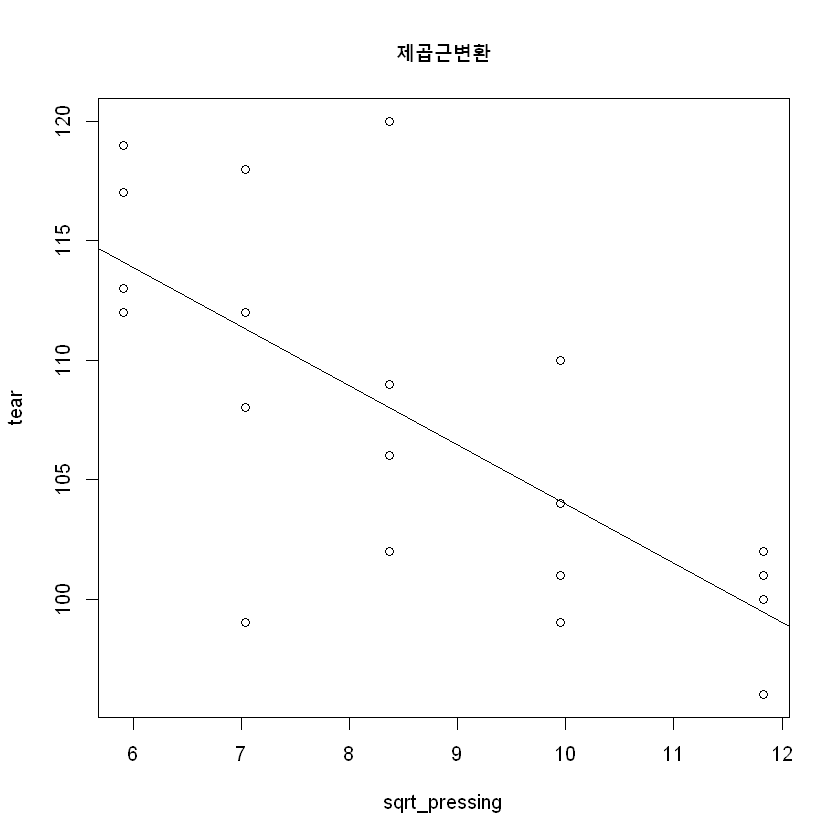

In [30]:
plot(tear ~ sqrt_pressing)
    abline(fit_sqrt$coefficients[1], fit_sqrt$coefficients[2])
    title("제곱근변환")

산점도를 통해 회귀식에 벗어나 분포하는 자료들을 확인할 수 있는데, 잔차도를 그려 보다 자세히 살펴보면 다음과 같다.

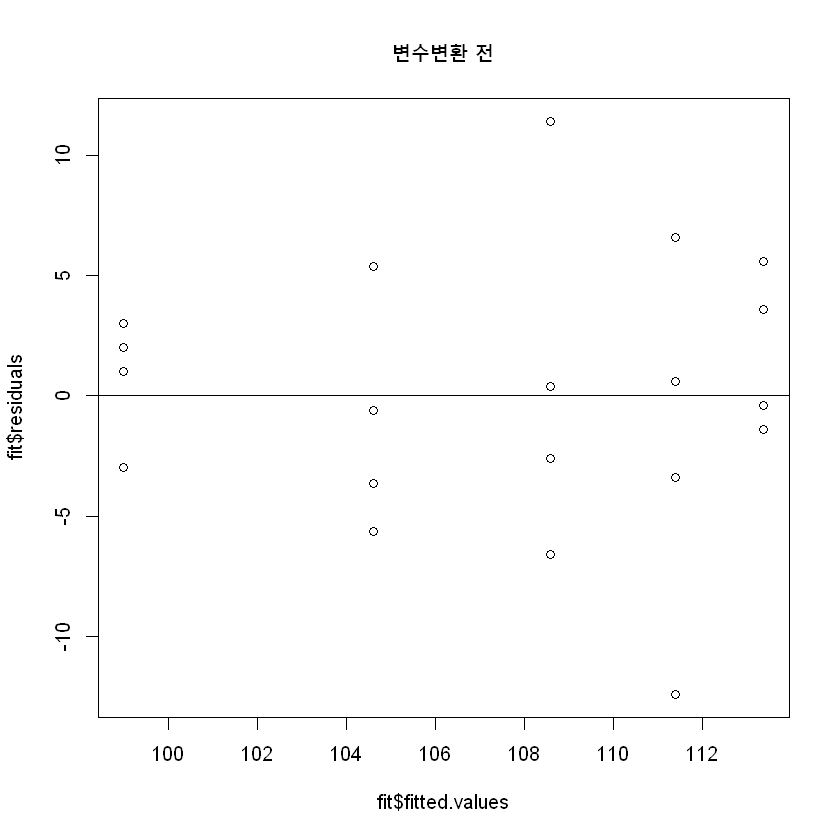

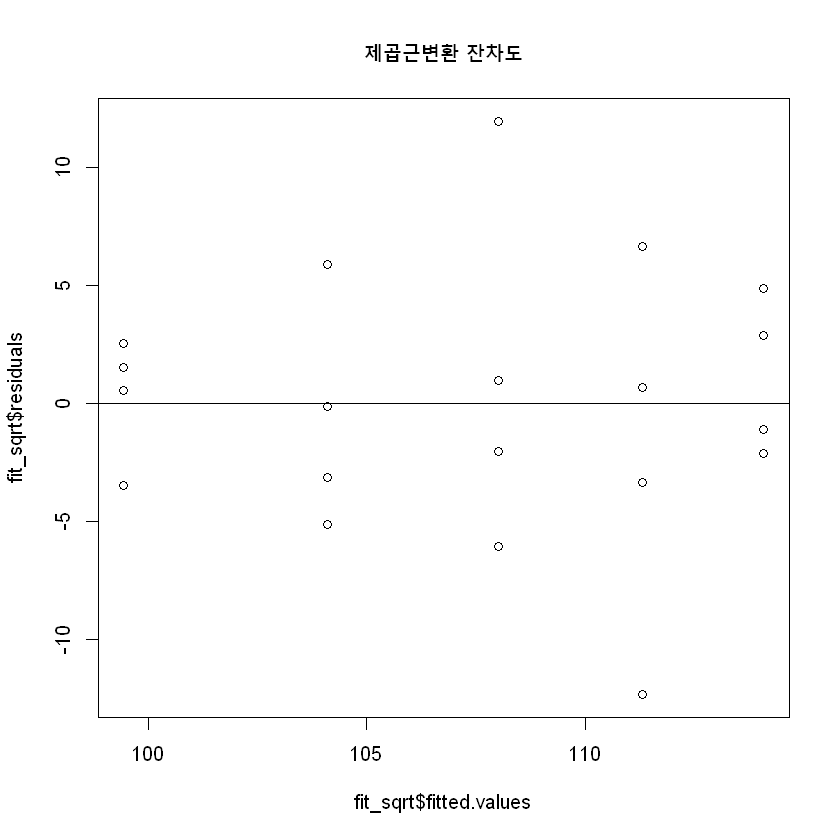

In [31]:
# residual plot
plot(fit$fitted.values, fit$residuals)
    abline(h=0)
    title("변수변환 전")

plot(fit_sqrt$fitted.values, fit_sqrt$residuals)
    abline(h=0)
    title("제곱근변환 잔차도")

제곱근변환을 한 모형의 잔차도도 로그변환을 한 모형에서와 마찬가지로, 뚜렷하진 않으나 변수변환 전에 비하여 잔차들이 퍼진 정도가 보다 완화되었음을 확인할 수 있다. 

세 모형의 적합성을 보다 구체적으로 비교하기 위해 각 모형의 F통계량값과 R-squared값을 비교하여 보면 다음과 같다.



|Model|F통계량값|R-sq|
|:-:|:-:|:-:|
|Y-X|17.8|0.4972|
|Y-logX|21.06|0.5093|
|Y-sqrtX|18.56|0.5076|



F통계량값과 R-squared값 모두 로그변환을 한 모형이 가장 크다. 따라서 세 모형 중 로그변환을 한 모형이 가장 적합하다고 판단할 수 있다. 